# <span style = 'color:red'> <span style ='font-family:"monospace";font-size: 20pt;'>**TABLE OF CONTENTS**
1. **[Importing necessary libraries](#1)**
2. **[Reading the datasets](#2)**
3. **[Checking the application_data dataframe](#3)**<br>
    3.1 [Dropping unnecessary columns](#3.1)<br>
4. **[Handling missing data in application_data dataframe](#4)**<br>
    4.1 [Checking the null percentage of all columns](#4.1)<br>
    4.2 [Checking for outliers and imputing missing values](#4.2)<br>
    4.3 [Dealing with errors in Data types and Data](#4.3)<br>
5. **[Binning continuous variables and deriving new columns](#5)**<br>
6. **[Data Analysis of the application_data dataframe](#6)**<br>
    6.1 [Univariate Analysis](#6.1)<br>
    6.2 [Segmented Univariate Analysis](#6.2)<br>
    6.3 [Bivariate Analysis](#6.3)<br>
    6.4 [Top 10 Correlations](#6.4)<br>
    6.5 [Multivariate Analysis](#6.5)<br>
    6.6 [Pivot Tables](#6.6)<br>
7. **[Checking the previous application data dataframe](#7)**<br>
    7.1 [Checking the null percentage of all columns](#7.1)<br>
    7.2 [Univariate Analysis](#7.2)<br>
    7.3 [Top10 correlations in the previous application dataset](#7.3)<br>
    7.4 [Bivariate Analysis](#7.4)<br>
    7.5 [Analysis by merging both previous and new application data](#7.5)<br>
    7.6 [Pivot Tables](#7.6)<br>
8. **[Conclusion](#8)**

<a id='1'></a>
# <span style = 'font-family:"Times New Roman"'> 1. Importing necessary libraries </span>
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 150)

<a id='2'></a>
# <span style = 'font-family:"Times New Roman"'> 2. Reading the datasets </span>
***



In [2]:
application_data = pd.read_csv('application_data.csv')
previous_application_data = pd.read_csv('previous_application.csv')

<a id='3'></a>
# <span style = 'font-family:"Times New Roman"'> 3. Checking the application_data dataframe </span>
***



In [3]:
application_data.shape

(307511, 122)

In [4]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

<a id='3.1'></a>
### <span style = 'font-family:"Times New Roman"'> 3.1 Dropping unnecessary columns </span>


In [7]:
# Removing all the columns which we found irrelevant for our analysis.
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
#Dropping columns starting with flag_document
flag_document_columns = []

for col in application_data.columns:
    if col.startswith("FLAG_DOCUMENT"):
        flag_document_columns.append(col)

application_data.drop(labels = flag_document_columns,axis =1,inplace=True)

In [9]:
#Dropping 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' columns
columns_to_drop = ['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

application_data.drop(labels = columns_to_drop,axis =1,inplace=True)
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_A

In [10]:
# Dropping more unnecessary columns for our analysis

unnecessary_cols = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

application_data.drop(labels = unnecessary_cols,axis =1,inplace=True)
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_H

In [11]:
# Dropping 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'
application_data.drop(labels = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'],axis =1,inplace=True)
application_data.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [12]:
# Dropping 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'

application_data.drop(labels = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis =1,inplace=True)
application_data.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [13]:
application_data.shape

(307511, 30)

#### <span style = 'color:green'> We have dropped the columns which "we" won't be using in our analysis just for the sake of having our dataframe clean, so we don't get confused having a lot of columns. Now that we have the columns which we will be using for analysis, let's clean the data and handle the missing values.

<a id='4'></a>
# <span style = 'font-family:"Times New Roman"'> 4. Handling missing data in application_data dataframe </span>
***



<a id='4.1'></a>
### <span style = 'font-family:"Times New Roman"'> 4.1 Checking the null percentage of all columns </span>


In [14]:
# Checking the percentage of null values for all the attributes.

# Null percentage in application data 
null_perc = (application_data.isnull().sum()/len(application_data) * 100)

# Rounding off to 2 digits and sorting in descending order 
null_df = round(null_perc,2).sort_values(ascending = False)
null_df.head(20)

OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
NAME_FAMILY_STATUS             0.00
dtype: float64

<a id='4.2'></a>
### <span style = 'font-family:"Times New Roman"'> 4.2 Checking for outliers and imputing missing values</span>


In [15]:
# Lets drop these columns with null percentage greater than 35%.

columns_to_drop = list(null_df[null_df > 35].index)
application_data.drop(labels = columns_to_drop,axis =1,inplace=True)

In [16]:
# Checking the shape of the dataframe after dropping the columns.

application_data.shape


(307511, 29)

In [17]:
# Null percentage for the remaining columns.

round((application_data.isnull().sum()/len(application_data)*100),2).sort_values(ascending=False).head(20)


OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
NAME_CONTRACT_TYPE             0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
TARGET                         0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
CODE_GENDER                    0.00
NAME_FAMILY_STATUS             0.00
NAME_INCOME_TYPE               0.00
dtype: float64

In [18]:
# Columns with null percentage greater than 0

print('These are the columns with null values: ')
list(application_data.columns[application_data.isnull().sum()/len(application_data)*100 > 0])


These are the columns with null values: 


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### <span style = 'color:green'> Lets deal with these columns one by one

### <span style = 'font-family:"Times New Roman"'> Dealing with AMT_ANNUITY</span>

In [19]:
print('Number of null values: {0}'.format(application_data['AMT_ANNUITY'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['AMT_ANNUITY'].isnull().sum()/len(application_data)*100))
                         

Number of null values: 12
Percentage of null values: 0.003902299429939092


In [20]:
# Let's examine these rows having AMT_ANNUITY as null value

application_data[application_data['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,-4946.0,-3238,High skill tech staff,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,-3640.0,-741,Laborers,2.0,Business Entity Type 1,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,-11524.0,-831,Cooking staff,2.0,Self-employed,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-11329,-2040,-3195.0,-3069,Core staff,2.0,Government,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,-11285.0,-3305,Laborers,1.0,Other,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,-771.0,-4203,Drivers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,-858.0,-591,Medicine staff,2.0,Medicine,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,-168.0,-4250,Secretaries,2.0,Self-employed,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-10151,-472,-10127.0,-2787,Security staff,2.0,Security,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Unaccompanied,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,-482.0,-4192,Sales staff,2.0,Business Entity Type 3,0.0,0.0,1.0,0.0,0.0,2.0


<span style = 'color:purple'>There are a total of 12 null values and all of these belong to 'Cash loans' NAME_CONTRACT_TYPE

In [21]:
application_data['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

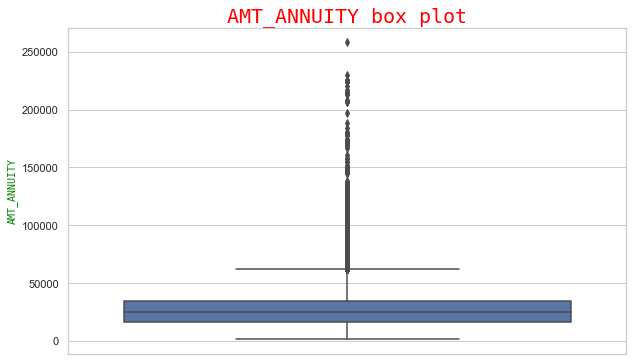

In [22]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[10,6])

sns.boxplot(y = application_data['AMT_ANNUITY'])

plt.title("AMT_ANNUITY box plot",fontdict={'family':'monospace','fontsize': 20, 'fontweight' : 7, 'color' : 'Red'})

plt.ylabel("AMT_ANNUITY", fontdict={'family':'monospace','fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [23]:
application_data['AMT_ANNUITY'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 1])

0.50     24903.0
0.70     32004.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'>Sometimes, it is beneficial if we look into the quantiles instead of the box plot.<br><br>
Quantiles would give us a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.<br><br>
Max value is 258025.5 and there is a huge difference between the 99th percentile and the max value.<br>
Hence, we can say with confidence that there are outliers and since AMT_ANNUITY is a continuous variable and has numeric data, and since the outlier is very far fetched, it is better to impute the missing values with the <span style = 'color:red'>MEDIAN</span> instead of mean. And since we have seen that all the null values belong to 'Cash loans', we can just replace with median of all the rows with Cash loans and NAME_CONTRACT_TYPE.

In [24]:
print('Overall median of AMT_ANNUITY :{0}'.format(application_data['AMT_ANNUITY'].median()))
print('Median value when NAME_CONTRACT_TYPE is Cash loans : {0}'.format(application_data[application_data['NAME_CONTRACT_TYPE']=='Cash loans']['AMT_ANNUITY'].median()))


Overall median of AMT_ANNUITY :24903.0
Median value when NAME_CONTRACT_TYPE is Cash loans : 26086.5


### <span style = 'font-family:"Times New Roman"'> Dealing with AMT_GOODS_PRICE</span>

In [25]:
print('Number of null values: {0}'.format(application_data['AMT_GOODS_PRICE'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['AMT_GOODS_PRICE'].isnull().sum()/len(application_data)*100))

                         

Number of null values: 278
Percentage of null values: 0.09040327012692229


In [26]:
application_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

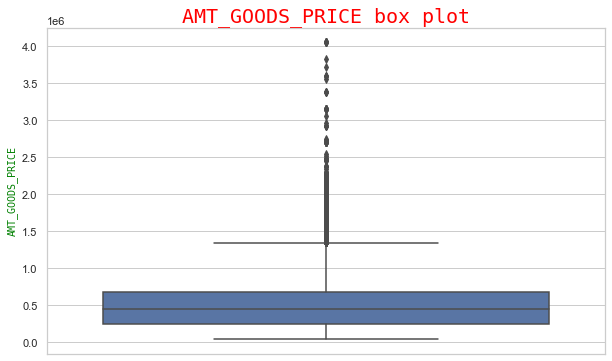

In [27]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[10,6])

sns.boxplot(y = application_data['AMT_GOODS_PRICE'])

plt.title("AMT_GOODS_PRICE box plot",fontdict={'family':'monospace','family':'monospace','family':'monospace','fontsize': 20, 'fontweight' : 7, 'color' : 'Red'})

plt.ylabel("AMT_GOODS_PRICE", fontdict={'family':'monospace','family':'monospace','fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [28]:
application_data['AMT_GOODS_PRICE'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 1])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'>Sometimes, it is beneficial if we look into the quantiles instead of the box plot.<br><br>
Quantiles would give us a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.<br><br>
Max value is  4050000.0 and there is a huge difference between the 99th percentile and the max value.<br>
Hence, we can say with confidence that there are outliers and since AMT_GOODS_PRICE has numeric data, and since the outlier is very far fetched, it is better to impute the missing values with the <span style = 'color:red'>MEDIAN</span> instead of mean.

In [29]:
application_data['AMT_GOODS_PRICE'].median()

450000.0

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_TYPE_SUITE</span>

In [30]:
print('Number of null values: {0}'.format(application_data['NAME_TYPE_SUITE'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['NAME_TYPE_SUITE'].isnull().sum()/len(application_data)*100))
                         

Number of null values: 1292
Percentage of null values: 0.42014757195677555


In [31]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
application_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

<span style = 'font-family:"Helvicita"'><span style = 'color:blue'>We can see that NAME_TYPE_SUITE is a categorical variable, we can impute the missing values with the <span style = 'color:red'>MODE</span>, which is 'unaccompanied'.
    

### <span style = 'font-family:"Times New Roman"'> Dealing with OCCUPATION_TYPE</span>

In [33]:
print('Number of null values: {0}'.format(application_data['OCCUPATION_TYPE'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['OCCUPATION_TYPE'].isnull().sum()/len(application_data)*100))
                         

Number of null values: 96391
Percentage of null values: 31.345545362604916


In [34]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<span style = 'font-family:"Helvicita"'><span style = 'color:blue'>We can see that OCCUPATION_TYPE is a categorical variable and having 31% null values is a lot. We should be ignoring this column but since OCCUPATION_TYPE would be showing significant effect on whether the person would default the loan or not, we would not be ignoring this column.<br>
    
<span style = 'font-family:"Helvicita"'><span style = 'color:blue'>There are two ways in which we can deal with the missing values:<br><br>
    1. Replace the missing values with mode<br>
    2. Delete these rows from our analysis<br>
    3. Mark these rows as np.NaN => Marking the rows as missing. <br><br>
But since, replacing almost 31% with mode would have significant effect(in a bad way) on our analysis, and deleting 31% of the rows is also bad, we can just mark the rows as missing(np.NaN).

### <span style = 'font-family:"Times New Roman"'> Dealing with CNT_FAM_MEMBERS</span>

In [35]:
print('Number of null values: {0}'.format(application_data['CNT_FAM_MEMBERS'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['CNT_FAM_MEMBERS'].isnull().sum()/len(application_data)*100))
                             

Number of null values: 2
Percentage of null values: 0.0006503832383231819


In [36]:
# Lets examine these 2 rows where CNT_FAM_MEMBERS is null

application_data[application_data['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,-3265.0,-4489,Managers,NaN,Insurance,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,-1597.0,-1571,Accountants,NaN,Business Entity Type 2,0.0,0.0,0.0,0.0,0.0,1.0


<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'>Since there are just 2 missing values, and we cant come to a conslusion by looking at these two rows, it is better of not imputed. => Drop the records with missing values.

### <span style = 'font-family:"Times New Roman"'> Dealing with<br> AMT_REQ_CREDIT_BUREAU_HOUR<br>AMT_REQ_CREDIT_BUREAU_DAY<br>AMT_REQ_CREDIT_BUREAU_WEEK<br>AMT_REQ_CREDIT_BUREAU_MON<br>AMT_REQ_CREDIT_BUREAU_QRT<br>AMT_REQ_CREDIT_BUREAU_YEAR

In [37]:
credit_bureau_list = ['AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in credit_bureau_list:
    print(application_data[i].value_counts(), sep = '\n')


0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0 

In [38]:
print('Number of null values: {0}'.format(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()))

print('Percentage of null values: {0}'.format(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()/len(application_data)*100))
                         

Number of null values: 41519
Percentage of null values: 13.501630835970097


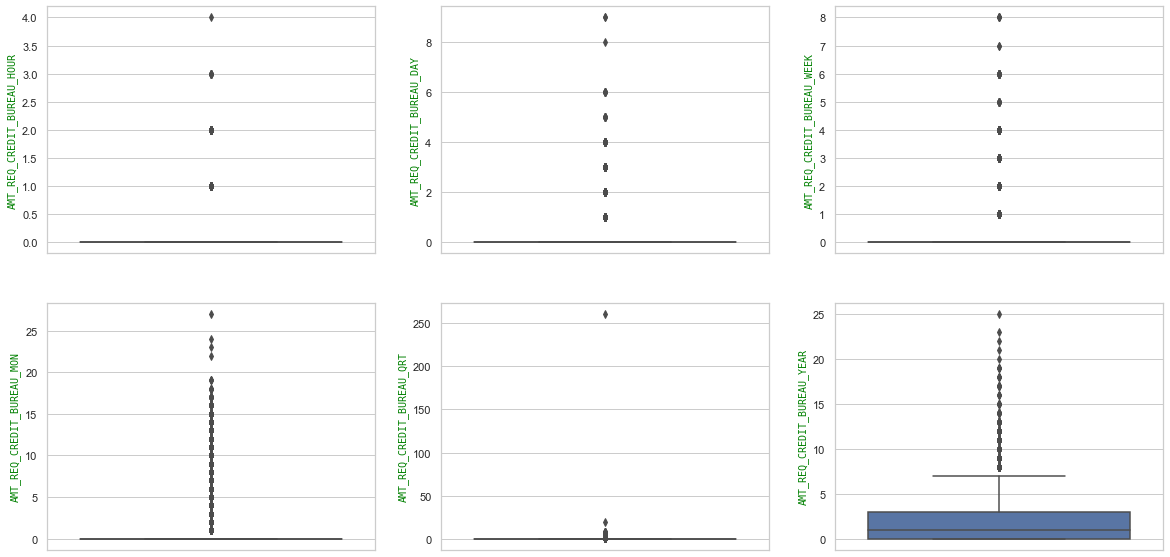

In [39]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[20,10])

#Using subplots and plotting all the attributes in credit_bureau_list
for i in range(len(credit_bureau_list)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = application_data[credit_bureau_list[i]])
    plt.ylabel(credit_bureau_list[i], fontdict={'family':'monospace','fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> Since all the attributes in credit_bureau_list are related to credit inquiry, it is better to replace missing values with <span style= 'color:red'>MODE,</span> that is the most frequent value.

In [40]:
for i in credit_bureau_list:
    print("Mode of {0} is {1}".format(i,application_data[i].mode()))

Mode of AMT_REQ_CREDIT_BUREAU_HOUR is 0    0.0
dtype: float64
Mode of AMT_REQ_CREDIT_BUREAU_DAY is 0    0.0
dtype: float64
Mode of AMT_REQ_CREDIT_BUREAU_WEEK is 0    0.0
dtype: float64
Mode of AMT_REQ_CREDIT_BUREAU_MON is 0    0.0
dtype: float64
Mode of AMT_REQ_CREDIT_BUREAU_QRT is 0    0.0
dtype: float64
Mode of AMT_REQ_CREDIT_BUREAU_YEAR is 0    0.0
dtype: float64


### <span style = 'font-family:"Times New Roman"'> Now that we are done dealing with the missing values, Lets check all the data types and see if there are any columns having wrong data type.

<a id='4.3'></a>
### <span style = 'font-family:"Times New Roman"'> 4.3 Dealing with errors in Data types and Data</span>

In [41]:
application_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

### <span style = 'font-family:"Times New Roman"'> Handling the data types</span>

In [42]:
# Listing out all the numerical columns 
list(application_data.describe().columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [43]:
# Listing out all the categorical columns 
list(set(application_data.columns)- set(application_data.describe().columns))

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE']

In [44]:
# Converting 'FLAG_OWN_REALTY','FLAG_OWN_CAR' to numerical column as in converting 'Y' to 1 and 'N' to 0 and convert these columns to int

print(application_data['FLAG_OWN_REALTY'].value_counts())

application_data['FLAG_OWN_REALTY'] = application_data['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

application_data['FLAG_OWN_REALTY'] = pd.to_numeric(application_data['FLAG_OWN_REALTY'], errors='coerce')

application_data['FLAG_OWN_REALTY'].value_counts()


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [45]:
print(application_data['FLAG_OWN_CAR'].value_counts())

application_data['FLAG_OWN_CAR'] = application_data['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

application_data['FLAG_OWN_CAR'] = pd.to_numeric(application_data['FLAG_OWN_CAR'], errors='coerce')

print(application_data['FLAG_OWN_CAR'].value_counts())


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64


In [46]:
print(application_data['FLAG_OWN_REALTY'].dtypes)
print(application_data['FLAG_OWN_CAR'].dtypes)

int64
int64


In [47]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CRED

### <span style = 'font-family:"Times New Roman"'> Dealing with columns starting with DAYS_</span>

In [48]:
# We need to change all these negative values to positive. These are negative because it has passed certain days i.e., it is the past.

days_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

application_data[days_columns]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> We can see that all the values are negative. Maybe it is stored as negative because it is about how many days it has been, referring to past. We can just save them as positive numbers by using absolute function. 

In [49]:
application_data[days_columns] = abs(application_data[days_columns])
application_data[days_columns]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461.0,637.0,3648.0,2120.0
1,16765.0,1188.0,1186.0,291.0
2,19046.0,225.0,4260.0,2531.0
3,19005.0,3039.0,9833.0,2437.0
4,19932.0,3038.0,4311.0,3458.0
...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0
307507,20775.0,365243.0,4388.0,4090.0
307508,14966.0,7921.0,6737.0,5150.0
307509,11961.0,4786.0,2562.0,931.0


### <span style = 'font-family:"Times New Roman"'> Dealing with CODE_GENDER </span>

In [50]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<span style = 'color:purple'> Lets remove the rows with gender as 'XNA' as we do not have much information about this and since the count is just 4, we can just drop these rows from our analysis.

In [51]:
application_data = application_data[application_data['CODE_GENDER']!='XNA']
application_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### <span style = 'font-family:"Times New Roman"'> Dealing with ORGANIZATION_TYPE </span>

In [52]:
application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<span style = 'color:purple'> Let's replace XNA with NaN, so that we can be clear in our dataset.

In [53]:
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [54]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                    float64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH               float64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CRED

<a id='5'></a>
# <span style = 'font-family:"Times New Roman"'> 5. Binning continuous variables and deriving new columns </span>
***



### <span style = 'font-family:"Times New Roman"'> Deriving new and better columns </span>

In [55]:
#Since we have DAYS_BIRTH as an attribute in our dataframe, we can calculate age from this and then drop DAYS_BIRTH column        

application_data['AGE'] = (application_data['DAYS_BIRTH']/365).astype(int)


In [56]:
# Dropping DAYS_BIRTH column
application_data.drop(labels = ['DAYS_BIRTH'],axis =1,inplace=True)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637.0,3648.0,2120.0,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188.0,1186.0,291.0,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,225.0,4260.0,2531.0,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,3039.0,9833.0,2437.0,Laborers,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,3038.0,4311.0,3458.0,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54


In [57]:
#Since we have DAYS_EMPLOYED as an attribute in our dataframe, we can calculate YEARS_EMPLOYED from this and then drop DAYS_EMPLOYED column    

application_data['YEARS_EMPLOYED'] = round(application_data['DAYS_EMPLOYED']/365,1)


In [58]:
# Dropping DAYS_EMPLOYED column
application_data.drop(labels = ['DAYS_EMPLOYED'],axis =1,inplace=True)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,3648.0,2120.0,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25,1.7
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1186.0,291.0,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,45,3.3
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,4260.0,2531.0,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52,0.6
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,9833.0,2437.0,Laborers,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52,8.3
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,4311.0,3458.0,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54,8.3


### <span style = 'font-family:"Times New Roman"'> Binning the age column into different age groups </span>

In [59]:
application_data['AGE'].sort_values()

235444    20
279208    21
170384    21
170400    21
85007     21
          ..
169823    69
169562    69
124430    69
276202    69
65237     69
Name: AGE, Length: 307507, dtype: int64

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> AGE GROUPS<br>
    20 - 25 : YOUTH<br>
    25 - 40 : ADULT<br>
    40 - 55 : MIDDLE-AGE<br>
    55 - 70 : SENIOR<br>

In [60]:
# Binning 'AGE'

application_data['AGE_GROUP']=pd.cut(application_data['AGE'], bins=[19, 25, 40, 55, 71], labels=['Youth','Adult', 'Middle-Age', 'Senior'])
application_data['AGE_GROUP'].value_counts()


Adult         119602
Middle-Age    109497
Senior         62090
Youth          16318
Name: AGE_GROUP, dtype: int64

### <span style = 'font-family:"Times New Roman"'> Binning continuous variables for further and easy analysis </span>

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> Since AMT_CREDIT and AMT_INCOME_TOTAL are about Credit amount of the loan and Income of the client respectively, we need these variables for our analysis. So let's bin them


In [61]:
# AMT_INCOME_TOTAL
application_data['AMT_INCOME_TOTAL'].sort_values()

20727         25650.0
1678          25650.0
246104        26100.0
240137        26100.0
186643        26100.0
             ...     
131127      6750000.0
77768       9000000.0
246858     13500000.0
203693     18000090.0
12840     117000000.0
Name: AMT_INCOME_TOTAL, Length: 307507, dtype: float64

In [62]:
application_data['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 1])

0.50       147150.0
0.70       180000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> There is a huge difference between the maximum value and the 95th or 99th quantiles, so there are outliers in the data set.
Max value is 117000000.0 and there is a huge difference between the 99th percentile and the max value.<br>

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> TOTAL INCOME GROUPS<br>
    Binning them based on quantiles<br>
    0 - 0.2 : Very-Low<br>
    0.2 - 0.4 : Low<br>
    0.4 - 0.6 : Medium<br>
    0.6 - 0.8 : High<br>
    0.8 - 1 : Very-High<br>

In [63]:
application_data['TOTAL_INCOME_GROUP']=pd.qcut(application_data['AMT_INCOME_TOTAL'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very-Low','Low', 'Medium', 'High', 'Very-High'])
application_data['TOTAL_INCOME_GROUP'].value_counts()


Low          85755
High         75512
Very-Low     63671
Very-High    47117
Medium       35452
Name: TOTAL_INCOME_GROUP, dtype: int64

In [64]:
# AMT_CREDIT
application_data['AMT_CREDIT'].sort_values()

51295       45000.0
43617       45000.0
72466       45000.0
91081       45000.0
136953      45000.0
            ...    
17948     4050000.0
110459    4050000.0
133766    4050000.0
120757    4050000.0
119681    4050000.0
Name: AMT_CREDIT, Length: 307507, dtype: float64

In [65]:
application_data['AMT_CREDIT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 1])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> There is a huge difference between the maximum value and the 95th or 99th quantiles, so there are outliers in the data set.
Max value is 4050000.0 and there is a huge difference between the 99th percentile and the max value.<br>

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> AMT CREDIT GROUPS<br>
    Binning them based on quantiles<br>
    0 - 0.2 : Very-Low<br>
    0.2 - 0.4 : Low<br>
    0.4 - 0.6 : Medium<br>
    0.6 - 0.8 : High<br>
    0.8 - 1 : Very-High<br>

In [66]:
application_data['AMT_CREDIT_GROUP']=pd.qcut(application_data['AMT_CREDIT'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very-Low','Low', 'Medium', 'High', 'Very-High'])
application_data['AMT_CREDIT_GROUP'].value_counts()


Very-Low     64925
High         64024
Medium       61551
Very-High    58912
Low          58095
Name: AMT_CREDIT_GROUP, dtype: int64

In [67]:
# Listing out all the columns separately as numerical and categorical columns

print("------Numerical columns in our dataframe are:------\n")
print(list(application_data.describe().columns))
print()
print("------Categorical columns in our dataframe are:------\n")
print(list(set(application_data.columns)- set(application_data.describe().columns)))


------Numerical columns in our dataframe are:------

['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED']

------Categorical columns in our dataframe are:------

['AGE_GROUP', 'NAME_HOUSING_TYPE', 'TOTAL_INCOME_GROUP', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_CREDIT_GROUP', 'NAME_EDUCATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE']


<a id='6'></a>
# <span style = 'font-family:"Times New Roman"'> 6. Data Analysis</span>
***



### <span style = 'font-family:"Times New Roman"'> Let's check the imbalance first </span>

In [68]:
# 'TARGET' Variable
# 1 : Client with payment difficulties
# 0 : all other cases

round(application_data['TARGET'].value_counts(normalize=True)*100,2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

In [69]:
imbalance_ratio = round(application_data['TARGET'].value_counts(normalize=True)[0]/application_data['TARGET'].value_counts(normalize=True)[1],2)

print("The Imbalance ratio of target variable is : {0}".format(imbalance_ratio))


The Imbalance ratio of target variable is : 11.39


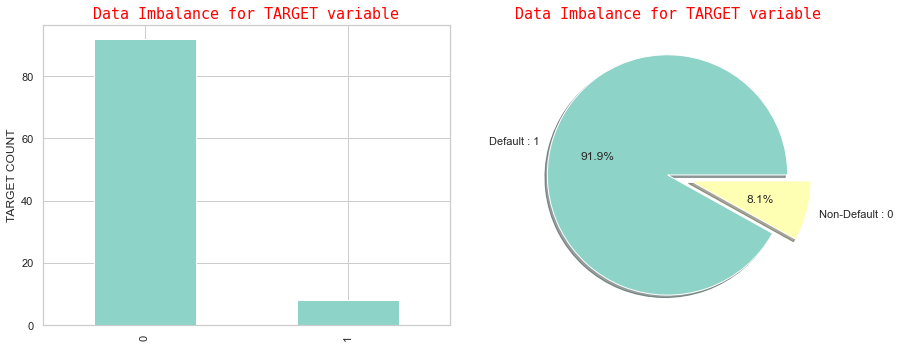

In [70]:
sns.set_theme(style="whitegrid")
sns.set_palette("Set3")
plt.figure(figsize=[13,5])
plt.subplot(1,2,1)
(application_data['TARGET'].value_counts(normalize=True)*100).plot.bar(ylabel="TARGET COUNT")
plt.title('Data Imbalance for TARGET variable',fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.subplot(1,2,2)
labels = ['Default : 1', 'Non-Default : 0']
sizes = [15, 30]
explode = (0, 0.2)  
(application_data['TARGET'].value_counts(normalize=True)*100).plot.pie(labels=labels,explode=explode,ylabel='',shadow=True,autopct='%1.1f%%')
plt.title('Data Imbalance for TARGET variable',fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})

plt.tight_layout()
plt.show()

<span style = 'font-family:"Helvicita"'> <span style = 'color:blue'> There is a huge difference between them both, this says that there is imbalance in the data. To deal with this, we separate our application_data into two dataframes, one with target variable as 0 and the other with 1.

In [71]:
# Target = 1 means that the person defaults and Target = 0 means that the person doesnt default.

application_data_non_defaulter=application_data[application_data['TARGET']==0]
application_data_defaulter = application_data[application_data['TARGET']==1]


<a id='6.1'></a>
## <span style = 'font-family:"Times New Roman"'> 6.1 Univariate Analysis </span>


##### <span style='color:red'> Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- NAME_CONTRACT_TYPE = Cash loans, Revolving loans
- NAME_TYPE_SUITE = Unaccompanied, FamilySpouse, partner,Children,Other_B,Other_A,Group of people
- NAME_INCOME_TYPE = 'Working', 'Commercial associate', 'Pensioner', 'State servant','Unemployed', 'Student', 'Businessman', 'Maternity leave'
- NAME_FAMILY_STATUS = 'Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown'
- NAME_HOUSING_TYPE = 'House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment'
- OCCUPATION_TYPE = 'Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers','High skill tech staff', 'Accountants', 'Medicine staff','Security staff', 'Cooking staff', 'Cleaning staff','Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff'
- ORGANIZATION_TYPE = Too long to list here
- AGE_GROUP = 'Adult', 'Middle-Age', 'Senior', 'Youth'

#### <span style = 'color:green'> Lets plot these columns one by one

In [72]:
# Defining a function to plot inorder to use it instead of typing in the code all over

def plot_categorical_variable(var_name, rot = 90):
    sns.set_theme(style="whitegrid")
    sns.set_palette('Set3')
    plt.figure(figsize=[15,7])
    
    # Plot for defaulters
    plt.subplot(1,2,1)
    defaulter = sns.countplot(var_name, data = application_data_defaulter, order = application_data_defaulter[var_name].value_counts().index, edgecolor=sns.color_palette("dark", 3))
    
    #Lets add percentage at the top of each bar for easier analysis.
    for p in defaulter.patches:
        total = len(application_data_defaulter[var_name])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        defaulter.annotate(percentage, (x, y), size = 14, ha='center')
        
    plt.title("Target = 1 : Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
    plt.xlabel(var_name,fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
    plt.xticks(rotation=rot)
    plt.ylabel("Count of defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
    
    # Plot for non-defaulters
    plt.subplot(1,2,2)
    non_defaulter = sns.countplot(var_name, data = application_data_non_defaulter, order = application_data_non_defaulter[var_name].value_counts().index, edgecolor=sns.color_palette("dark", 3))
    
    #Lets add percentage at the top of each bar for easier analysis.
    for p in non_defaulter.patches:
        total = len(application_data_non_defaulter[var_name])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        non_defaulter.annotate(percentage, (x, y), size = 14, ha='center')
    
    plt.title("Target = 0 : Non-default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
    plt.xlabel(var_name, fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
    plt.xticks(rotation=rot)
    plt.ylabel("Count of non-defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
    
    plt.tight_layout()
    plt.show()
    

In [73]:
# Defining a function to plot percentage of loan payment difficulty for a variable.

def loan_payment_difficulty(df, var_name, rotation=90):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=[8,7])
    per = df[[var_name, 'TARGET']].groupby([var_name],as_index=False).mean()
    per.sort_values(by='TARGET', ascending=False, inplace=True)

    sns.barplot(x=per[var_name].to_list(), y=per['TARGET'].to_list(), palette='Set3',edgecolor=sns.color_palette("dark", 1))
    plt.title("Percentage of loan payment difficulty", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
    plt.xlabel(var_name, fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'g'})
    plt.xticks(rotation=rotation)
    plt.ylabel("Percentage",fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'g'})



### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_CONTRACT_TYPE </span>

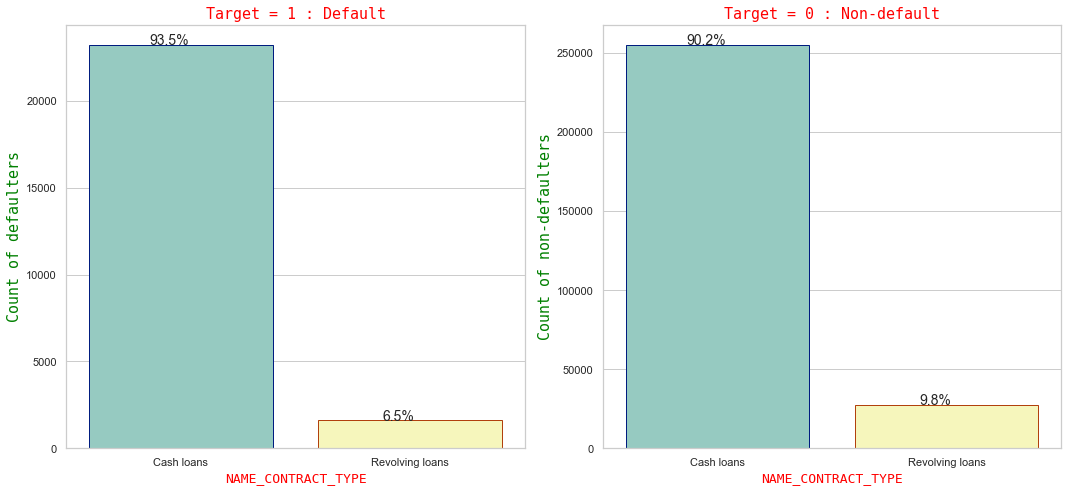

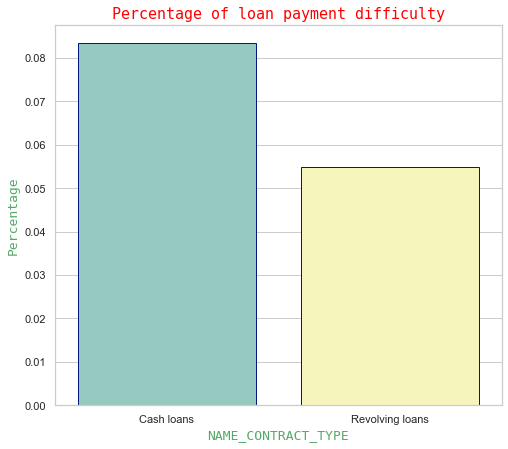

In [74]:
plot_categorical_variable('NAME_CONTRACT_TYPE', 0)
loan_payment_difficulty(application_data,'NAME_CONTRACT_TYPE', rotation=0)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Cash loans have maximum % of Loan-Payment Difficulties.<br>
    2. We can also observe that the count of Revolving loans is lesser in the defaulted population. So, we can say that revolving loans are comparatively safer. This might be because, revolving loan would allow the borrower to withdraw, repay and re-draw loans on the available funds.

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_TYPE_SUITE </span>

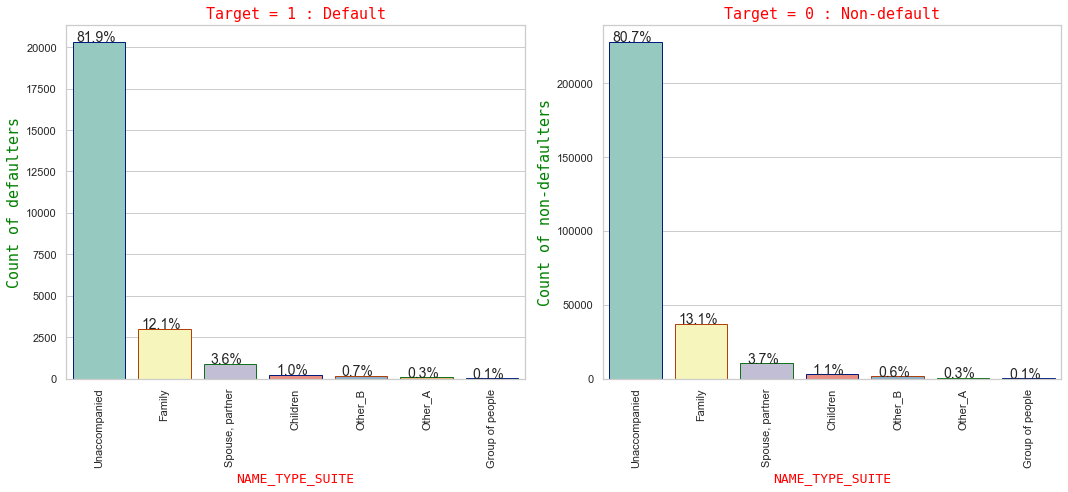

In [75]:
plot_categorical_variable('NAME_TYPE_SUITE', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Graphs look similar for both the cases apart from the number for each category.

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_INCOME_TYPE </span>

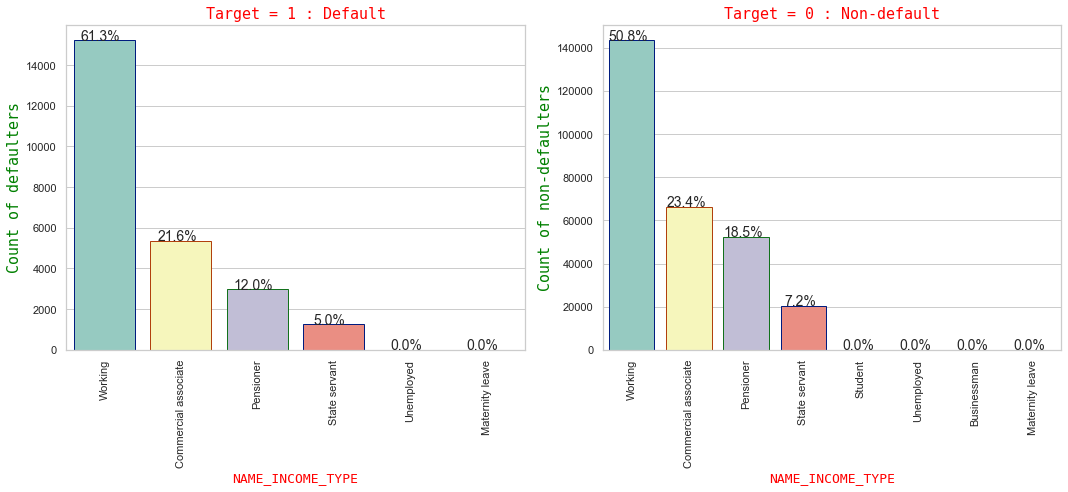

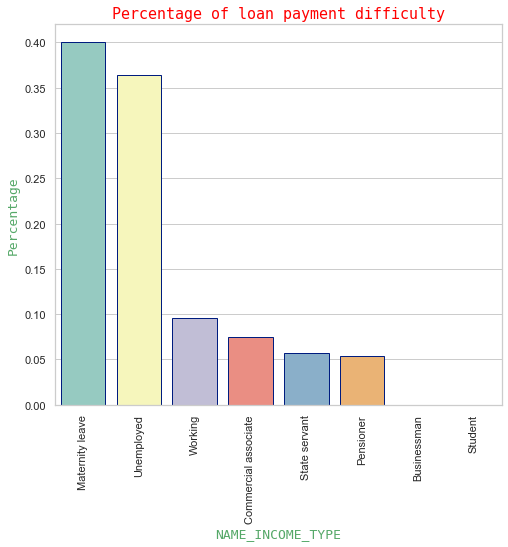

In [76]:
plot_categorical_variable('NAME_INCOME_TYPE', 90)
loan_payment_difficulty(application_data,'NAME_INCOME_TYPE', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Maternity leave' has the highest loan payment difficulty.<br>
    2. We can also see that 'Businessman','Pensioner' and 'Student' are our best bet here, because they have the least number of late payments.<br>
    3. We can see that 'Working' category has the highest number of defaulters as well as non-defaulters but the percentage is comparatively less.<br>
    4. Income type ‘Working’, ’Commercial associate’,'Pensioner', count is the highest.<br>

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_FAMILY_STATUS </span>

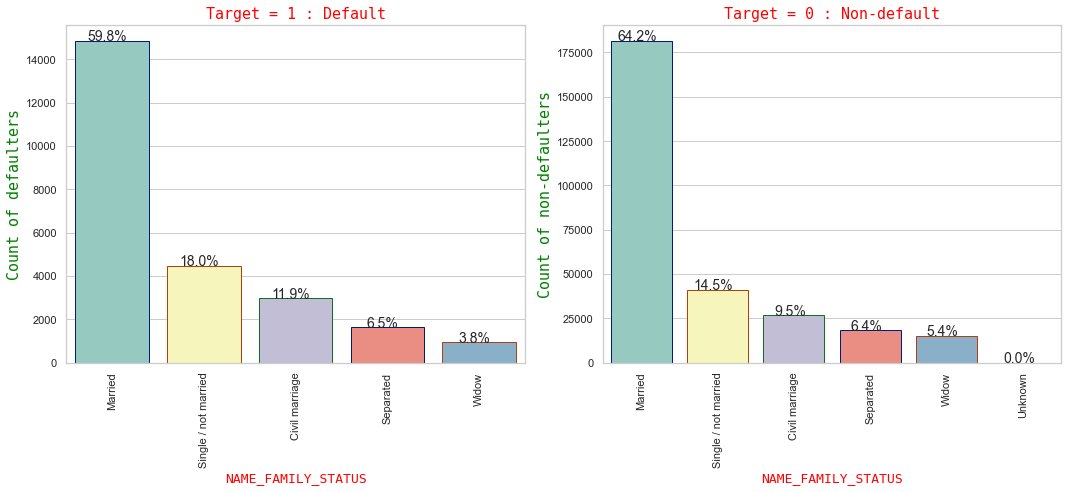

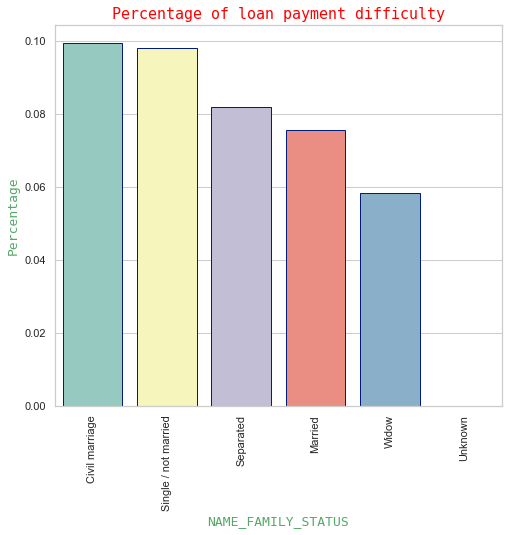

In [77]:
plot_categorical_variable('NAME_FAMILY_STATUS', 90)
loan_payment_difficulty(application_data,'NAME_FAMILY_STATUS', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Civil marriage' and 'Single/not married' has the highest loan payment difficulty.<br>
    2. We can also see that 'Married' people take more loans from the bank compared to others.<br>
    3. We can also observe that 'Single/not married' have more payment difficulties(default more)<br>
    4. We can see that tendency to default is higher for 'Single/not married' and 'Civil marriage' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_HOUSING_TYPE </span>

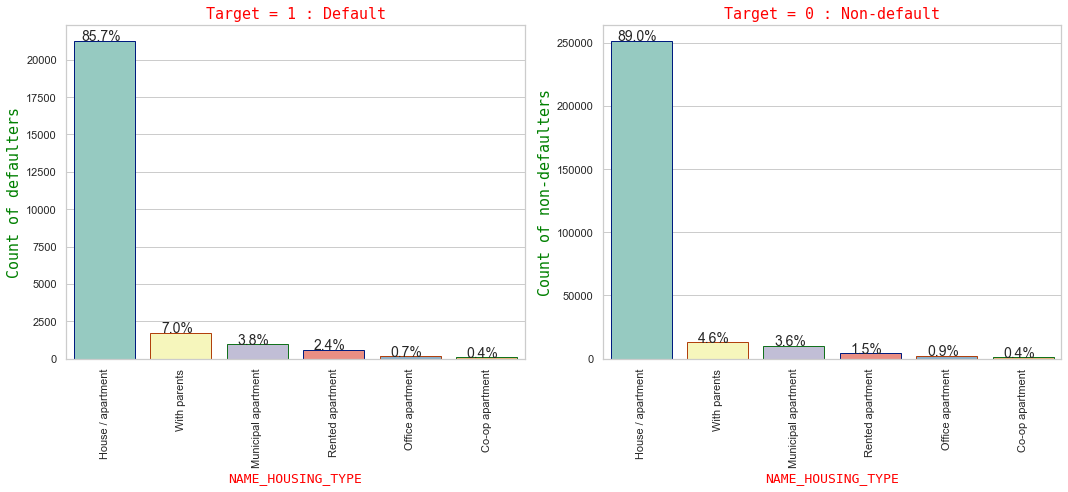

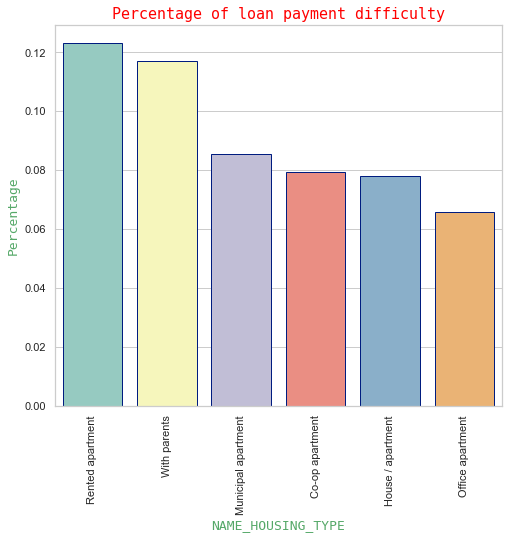

In [78]:
plot_categorical_variable('NAME_HOUSING_TYPE', 90)
loan_payment_difficulty(application_data,'NAME_HOUSING_TYPE', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Rented apartment' and 'With parents' has the highest loan payment difficulty.<br>
    2. We can also see that 'House/Apartment' people take more loans from the bank compared to others.<br>
    3. We can see that tendency to default is higher for who live 'With parents','Municipal Apartment' and 'Rented Apartment' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with FLAG_OWN_CAR </span>

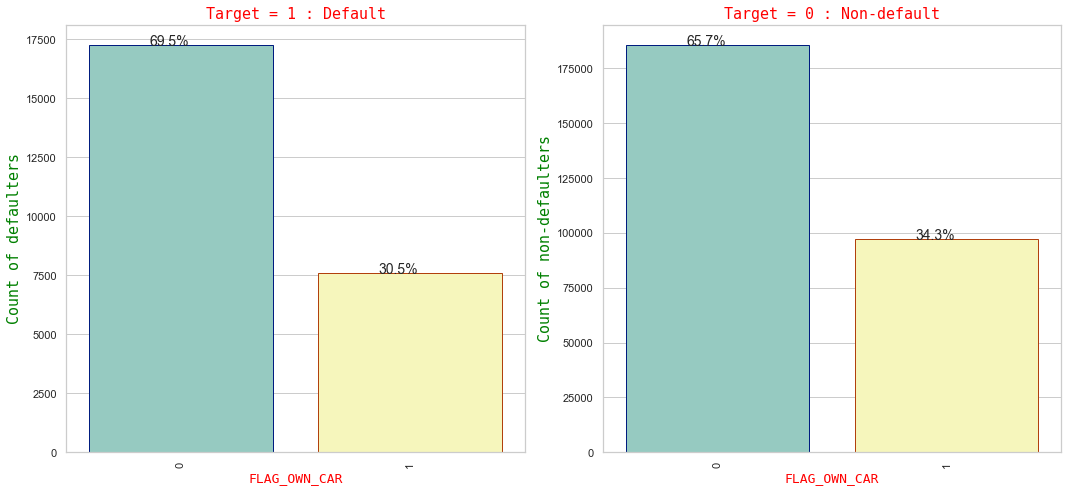

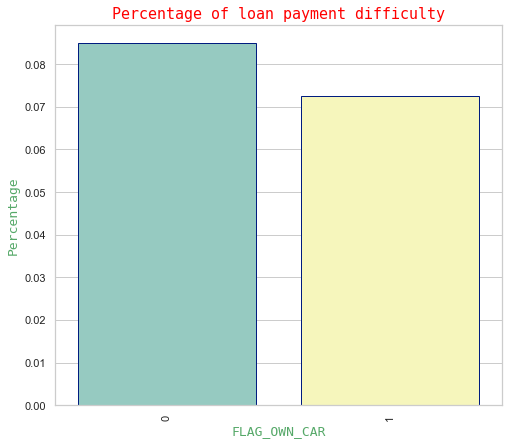

In [79]:
plot_categorical_variable('FLAG_OWN_CAR')
loan_payment_difficulty(application_data,'FLAG_OWN_CAR', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'People who don't own a car' has the highest loan payment difficulty.<br>
    2. We can also see that 'People who don't own a car' take more loans from the bank compared to others.<br>
    3. We can see that tendency to default is higher for 'People who don't own a car' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with FLAG_OWN_REALTY </span>

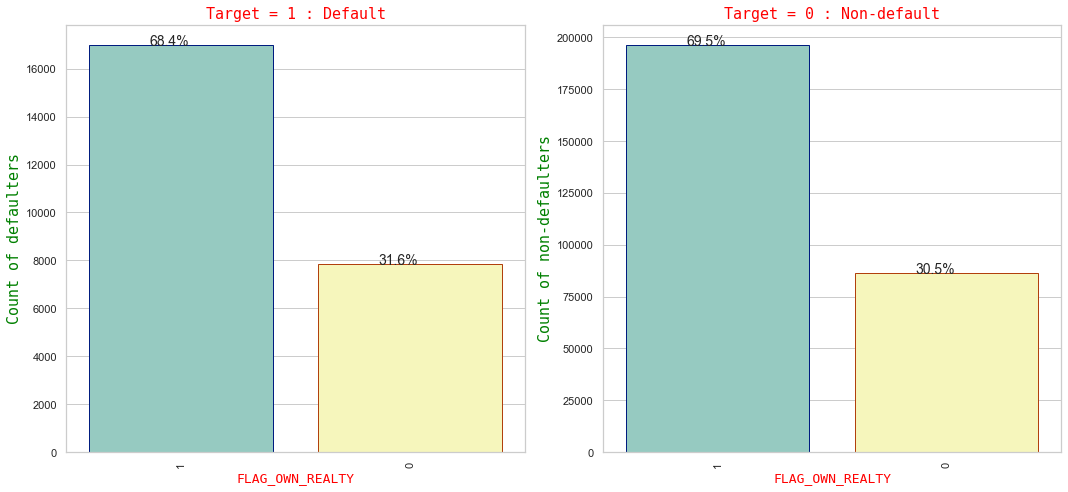

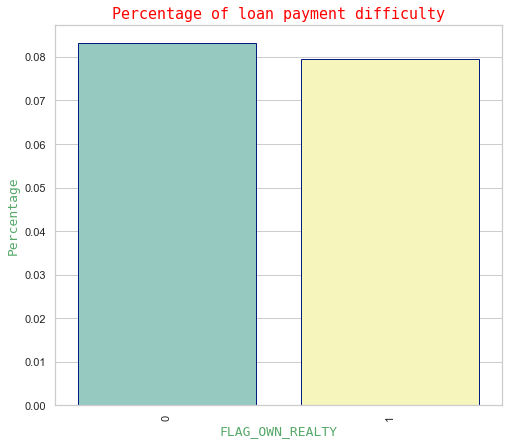

In [80]:
plot_categorical_variable('FLAG_OWN_REALTY')
loan_payment_difficulty(application_data,'FLAG_OWN_REALTY', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'People who don't own realty' has the highest loan payment difficulty.<br>
    2. We can also see that 'People who don't own realty' take more loans from the bank compared to others. So, it is better to check if they own realty or not before giving the loan. This also acts as a surity for us.<br>
    3. We can see that tendency to default is higher for 'People who don't own realty' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with OCCUPATION_TYPE </span>

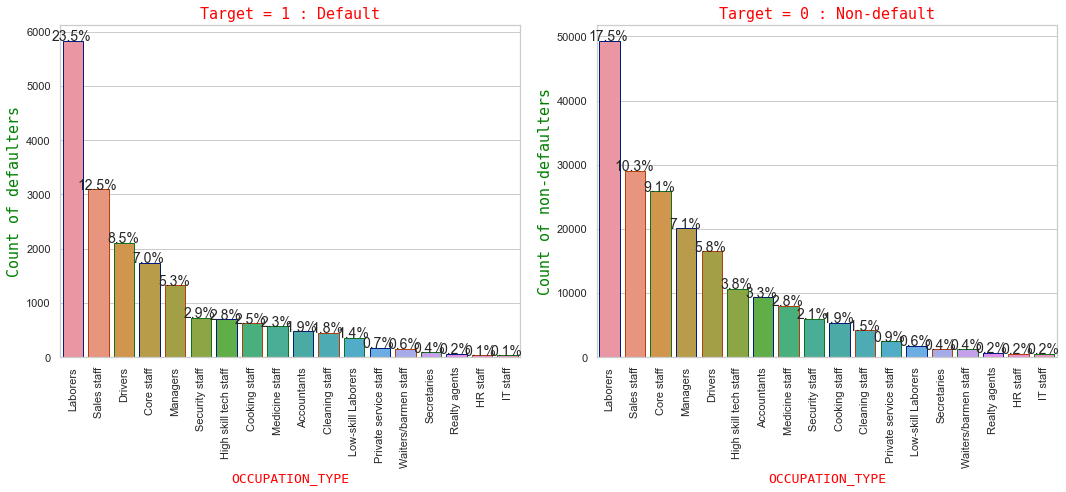

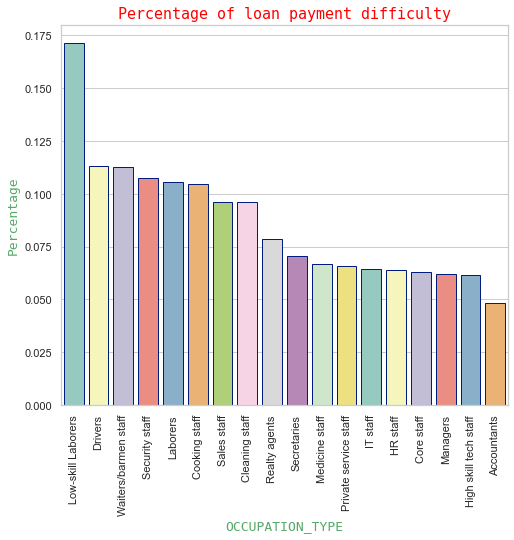

In [81]:
plot_categorical_variable('OCCUPATION_TYPE', 90)
loan_payment_difficulty(application_data,'OCCUPATION_TYPE', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Low-skill Laborers' has the highest loan payment difficulty.<br>
    2. We can see that 'HR staff' and 'IT staff' take less loans compared to others.<br>
    3. In general, 'Laborers' take the more loans from bank compared to others. <br>
    4. We can see that tendency to default is higher for 'Laborers' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with AGE_GROUP </span>

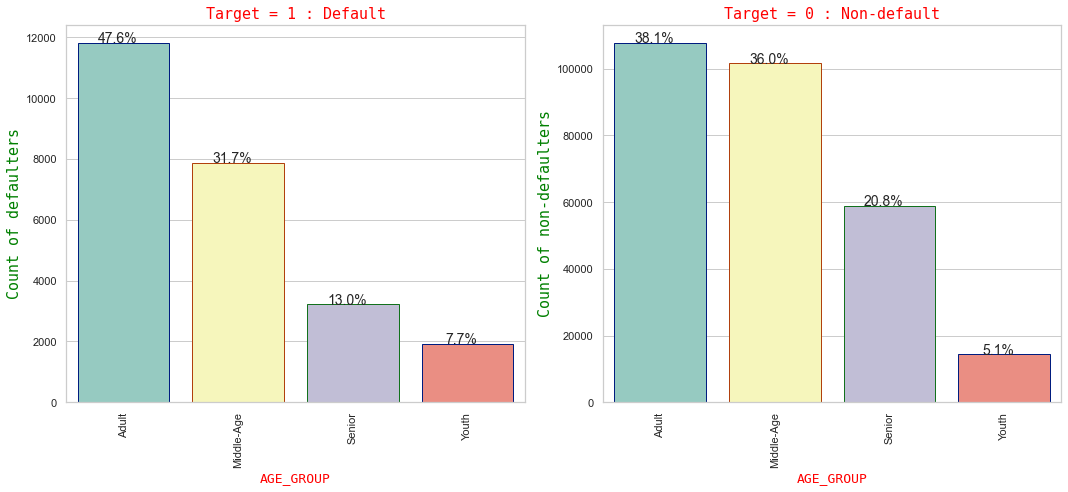

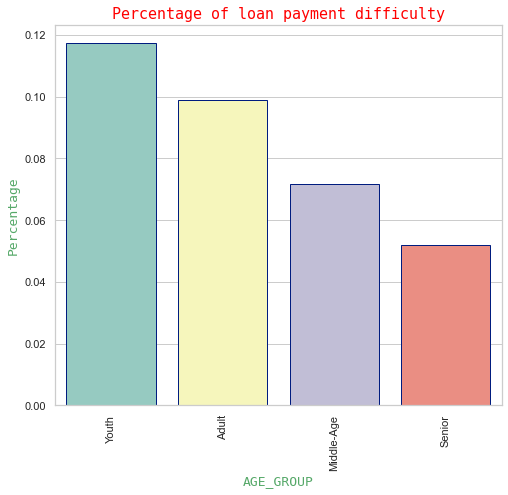

In [82]:
plot_categorical_variable('AGE_GROUP', 90)
loan_payment_difficulty(application_data,'AGE_GROUP', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Youth' has the highest loan payment difficulty.<br>
    2. We can see that 'Senior' has less payment difficulties. This also proves our point of 'pensioners' having less tendency to default.<br>
    3. In general, 'Adults' take the more loans from bank compared to others. <br>
    4. We can see that 'Middle-Age' also have less payment difficulties compared to 'Youth' and 'Adults'.<br>
    5. So, 'Senior' would be our safe bet<br>
    6. We can see that tendency to default is higher for 'Adults' and 'Youth' mainly because their default percentage is higher than non-default percentage.

### <span style = 'font-family:"Times New Roman"'> Dealing with CODE_GENDER </span>

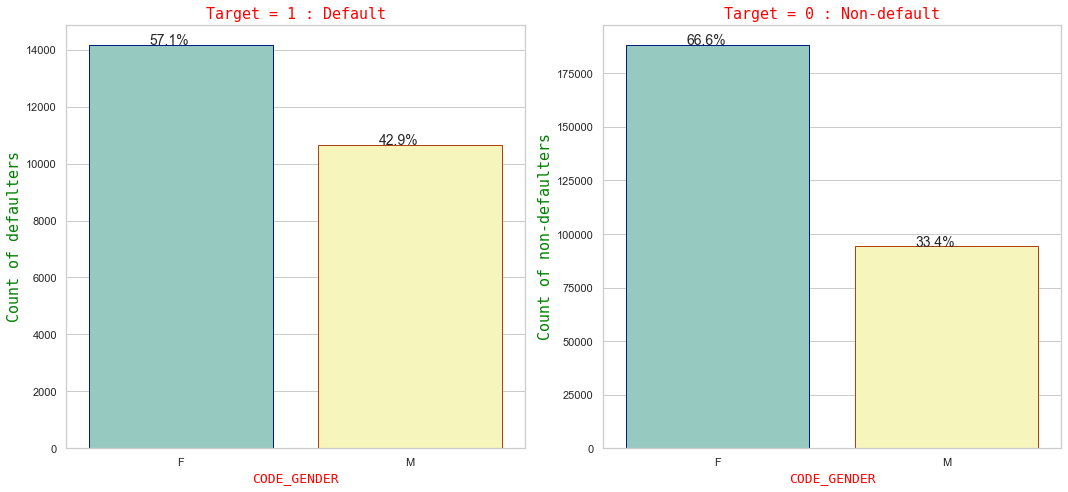

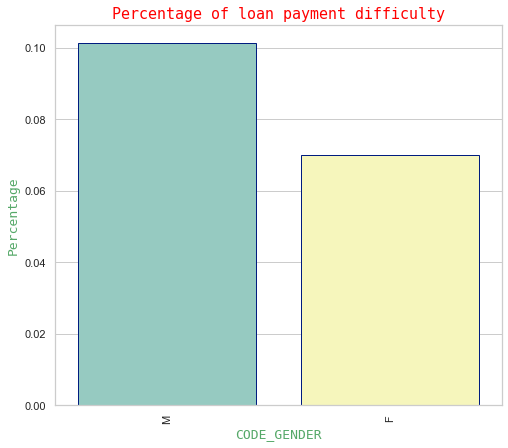

In [83]:
plot_categorical_variable('CODE_GENDER', 0)
loan_payment_difficulty(application_data,'CODE_GENDER', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Male' has the highest loan payment difficulty.<br>
    2. We can see that 'Female' take more loans than 'Male'.<br>
    3. We can see that tendency to default is higher for 'Female' compared to 'Male' mainly because default percentage for female is higher than non-default percentage for female.<br>

##### <span style='color:red'> Categorical ordered univariate analysis 

- NAME_EDUCATION_TYPE = 'Secondary / secondary special', 'Higher education','Incomplete higher', 'Lower secondary', 'Academic degree'
- TOTAL_INCOME_GROUP = 'Low', 'High', 'Very-Low', 'Very-High', 'Medium'
- AMT_CREDIT_GROUP = 'Very-Low', 'High', 'Medium', 'Very-High', 'Low'

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_EDUCATION_TYPE </span>

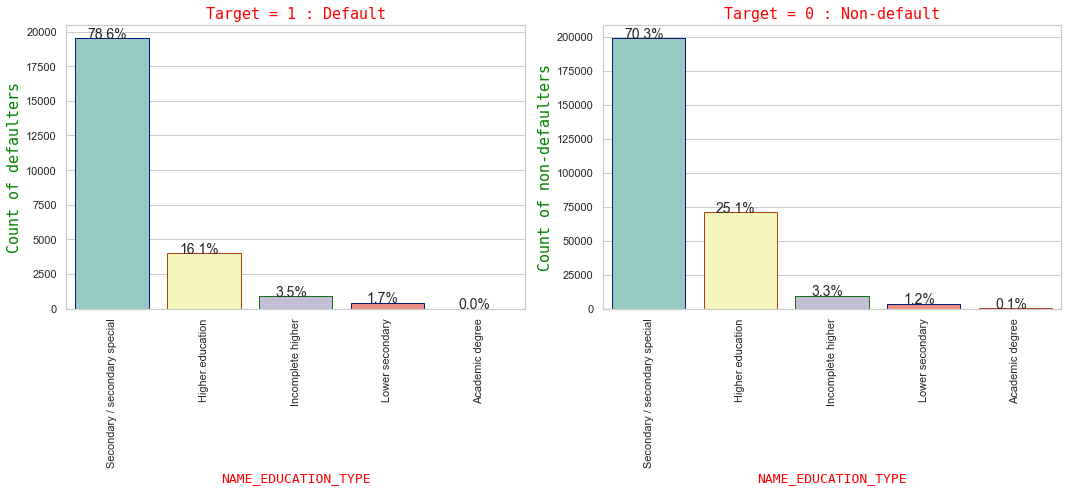

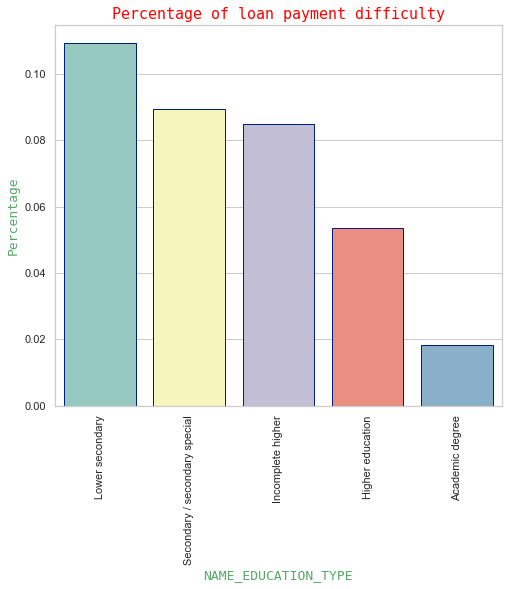

In [84]:
plot_categorical_variable('NAME_EDUCATION_TYPE', 90)
loan_payment_difficulty(application_data,'NAME_EDUCATION_TYPE', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Lower secondary' has the highest loan payment difficulty.<br>
    2. We can see that 'Secondary/secondary special' take more loans than others.<br>
    3. We can see that tendency to default is higher for 'Secondary/secondary special' mainly because default percentage for Secondary/secondary special is higher than non-default percentage for Secondary/secondary special.<br>
    4. We can see that people with 'Academic degree' take less loans from the bank and also have the least loan payment difficulty.

### <span style = 'font-family:"Times New Roman"'> Dealing with TOTAL_INCOME_GROUP </span>

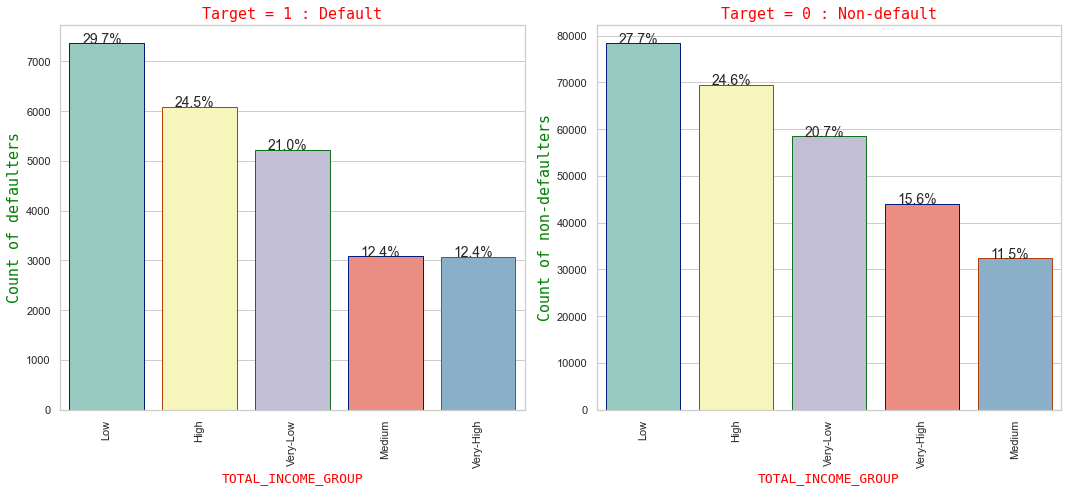

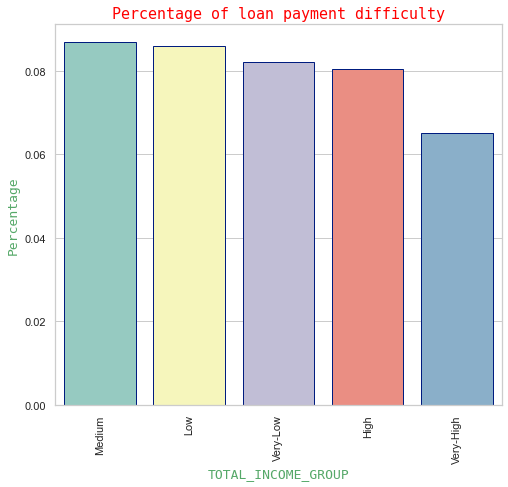

In [85]:
plot_categorical_variable('TOTAL_INCOME_GROUP', 90)
loan_payment_difficulty(application_data,'TOTAL_INCOME_GROUP', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Medium' income range has the highest loan payment difficulty.<br>
    2. We can see that 'Low' income range take more loans than others.<br>
    3. We can see that tendency to default is higher for 'Low', 'Very-Low' and 'Medium' income range mainly because their default percentage is higher than non-default percentage.<br>

### <span style = 'font-family:"Times New Roman"'> Dealing with AMT_CREDIT_GROUP </span>

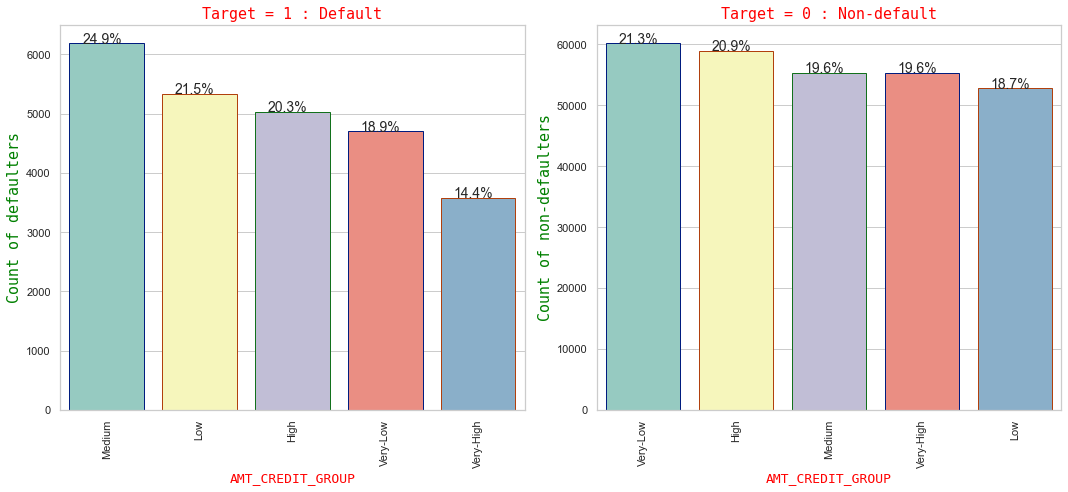

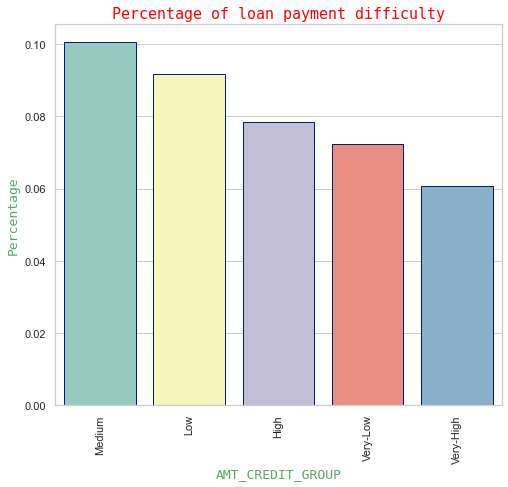

In [86]:
plot_categorical_variable('AMT_CREDIT_GROUP', 90)
loan_payment_difficulty(application_data,'AMT_CREDIT_GROUP', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Medium' credit group has the highest loan payment difficulty.<br>
    2. We can see that 'Medium' credit group take more loans than others.<br>
    3. We can see that tendency to default is higher for 'Low' and 'Very-Low' mainly because their default percentage higher than non-default percentage.<br>

##### <span style='color:red'> Numerical univariate analysis 

- AMT_GOODS_PRICE, CNT_CHILDREN, AMT_ANNUITY

### <span style = 'font-family:"Times New Roman"'> Dealing with AMT_GOODS_PRICE </span>


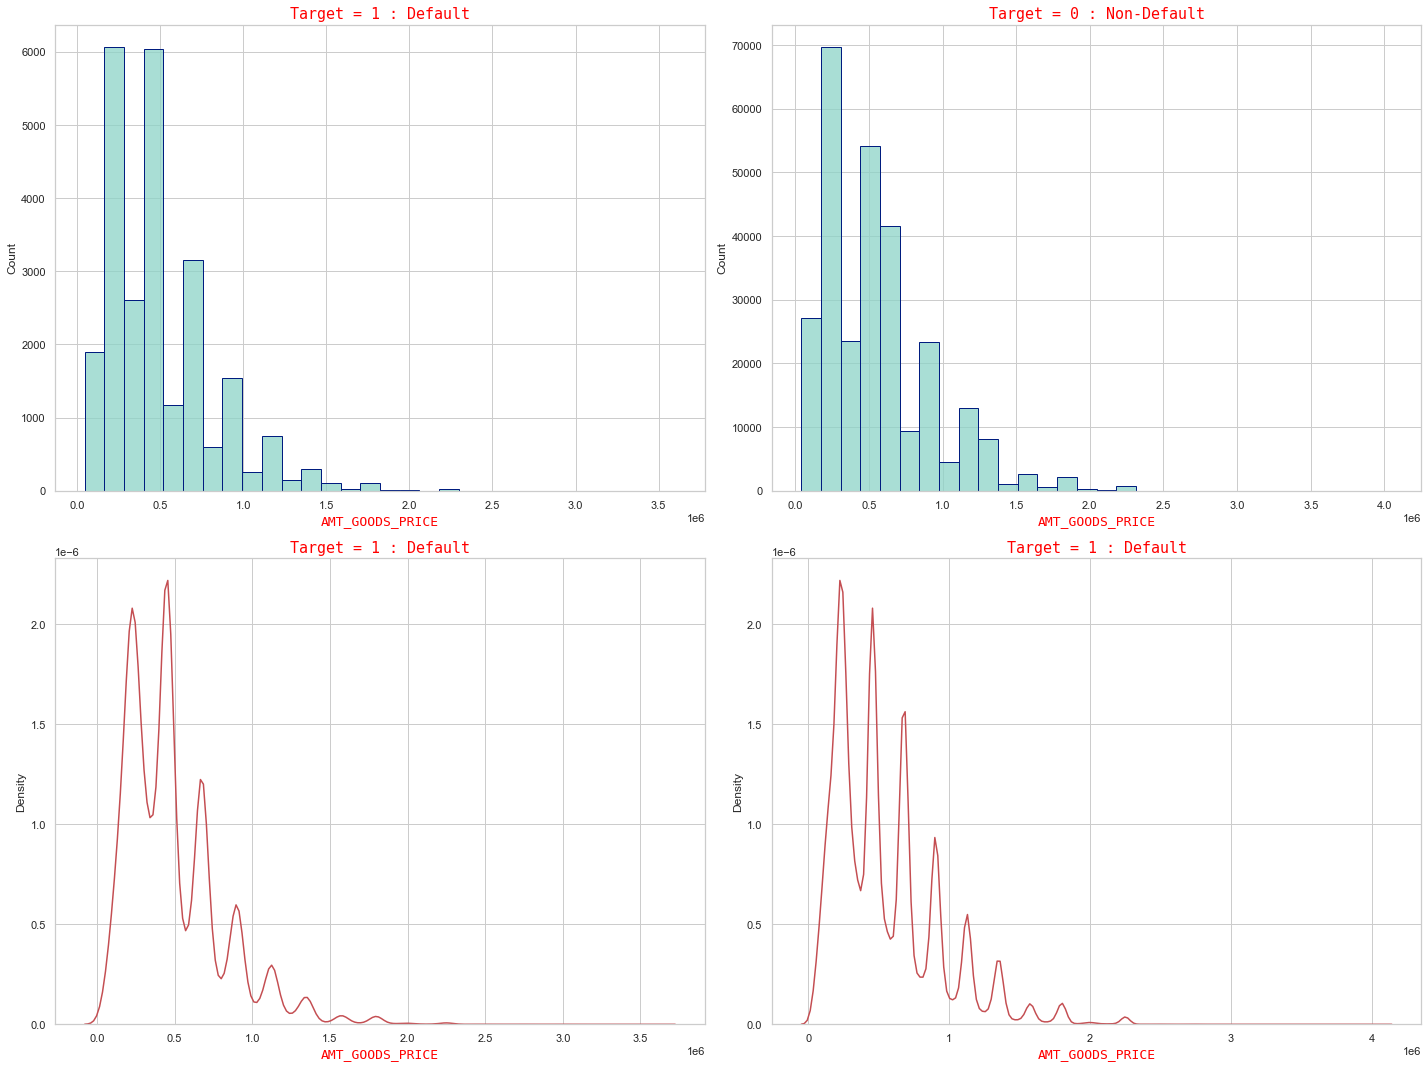

In [87]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set3')

plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
sns.histplot(data=application_data_defaulter, x='AMT_GOODS_PRICE', bins = 30, edgecolor=sns.color_palette("dark", 1))
plt.title("Target = 1 : Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_GOODS_PRICE',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
 
plt.subplot(2,2,2)
sns.histplot(data=application_data_non_defaulter, x='AMT_GOODS_PRICE', bins = 30, edgecolor=sns.color_palette("dark", 1))
plt.title("Target = 0 : Non-Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_GOODS_PRICE',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})    

plt.subplot(2,2,3)
sns.distplot(application_data_defaulter['AMT_GOODS_PRICE'], bins=15, color='r', hist=False)
plt.title("Target = 1 : Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_GOODS_PRICE',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})

plt.subplot(2,2,4)
sns.distplot(application_data_non_defaulter['AMT_GOODS_PRICE'], bins=15,color='r', hist=False)
plt.title("Target = 1 : Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_GOODS_PRICE',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})

plt.tight_layout()
plt.show()

### <span style = 'font-family:"Times New Roman"'> Dealing with CNT_CHILDREN </span>


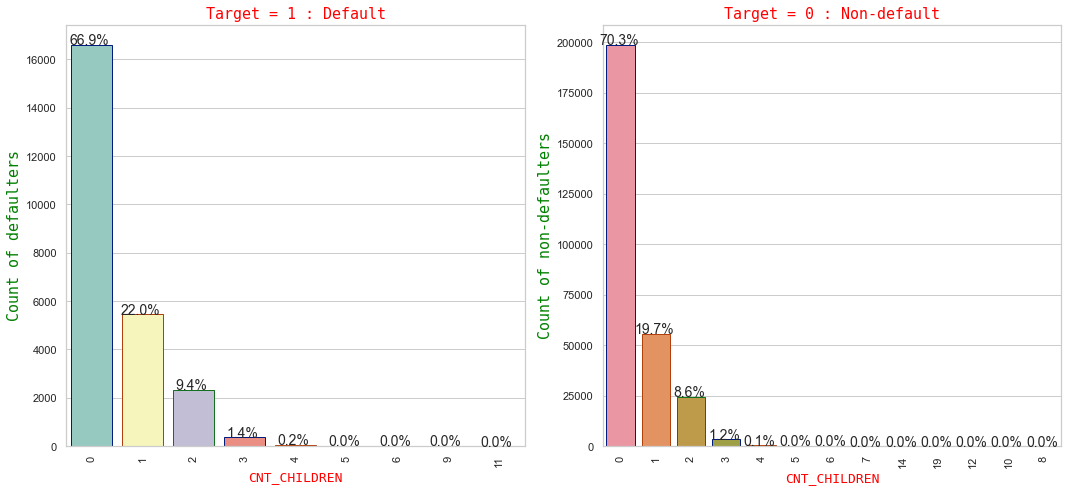

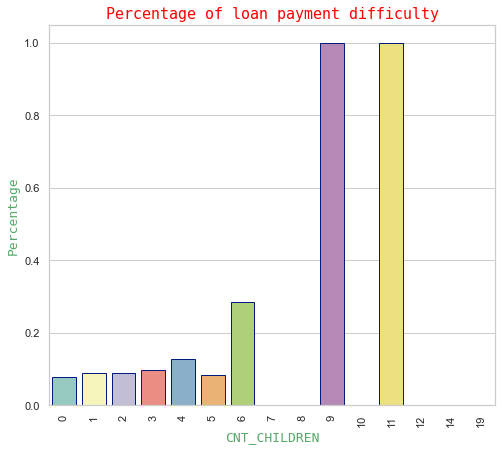

In [88]:
plot_categorical_variable('CNT_CHILDREN')
loan_payment_difficulty(application_data,'CNT_CHILDREN', 90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that People with more than more than 6 children has very high percentage of loan payment difficulty.<br>
    2. We can see that People with 0 children take more loans than others.<br>
    3. We can see that tendency to default is higher for people with more than 1 child because their default percentage higher than non-default percentage.<br>

### <span style = 'font-family:"Times New Roman"'> Dealing with AMT_ANNUITY </span>


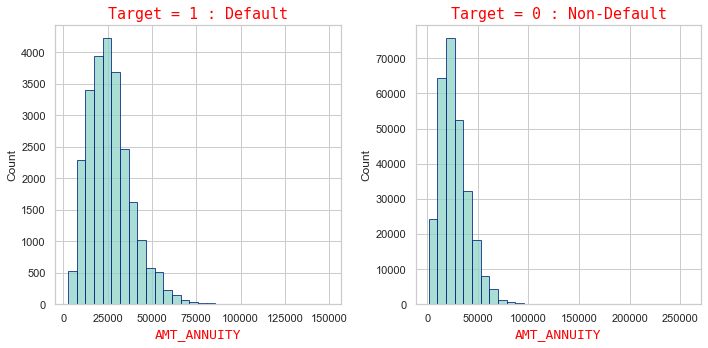

In [89]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set3')

plt.figure(figsize=[10,5])

# Plot for defaulters
plt.subplot(1,2,1)
sns.histplot(data=application_data_defaulter, x='AMT_ANNUITY', bins = 30, edgecolor=sns.color_palette("dark", 1))
plt.title("Target = 1 : Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_ANNUITY', fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
 
plt.subplot(1,2,2)
sns.histplot(data=application_data_non_defaulter, x='AMT_ANNUITY', bins = 30, edgecolor=sns.color_palette("dark", 1))
plt.title("Target = 0 : Non-Default",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('AMT_ANNUITY', fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})    

plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that most of the clients are in the first 25% of the AMT_ANNUITY.

<a id='6.2'></a>
## <span style = 'font-family:"Times New Roman"'> 6.2 Segmented Univariate Analysis </span>


##### <span style='color:red'> Segmenting TOTAL_INCOME_GROUP based on FLAG_OWN_REALTY 

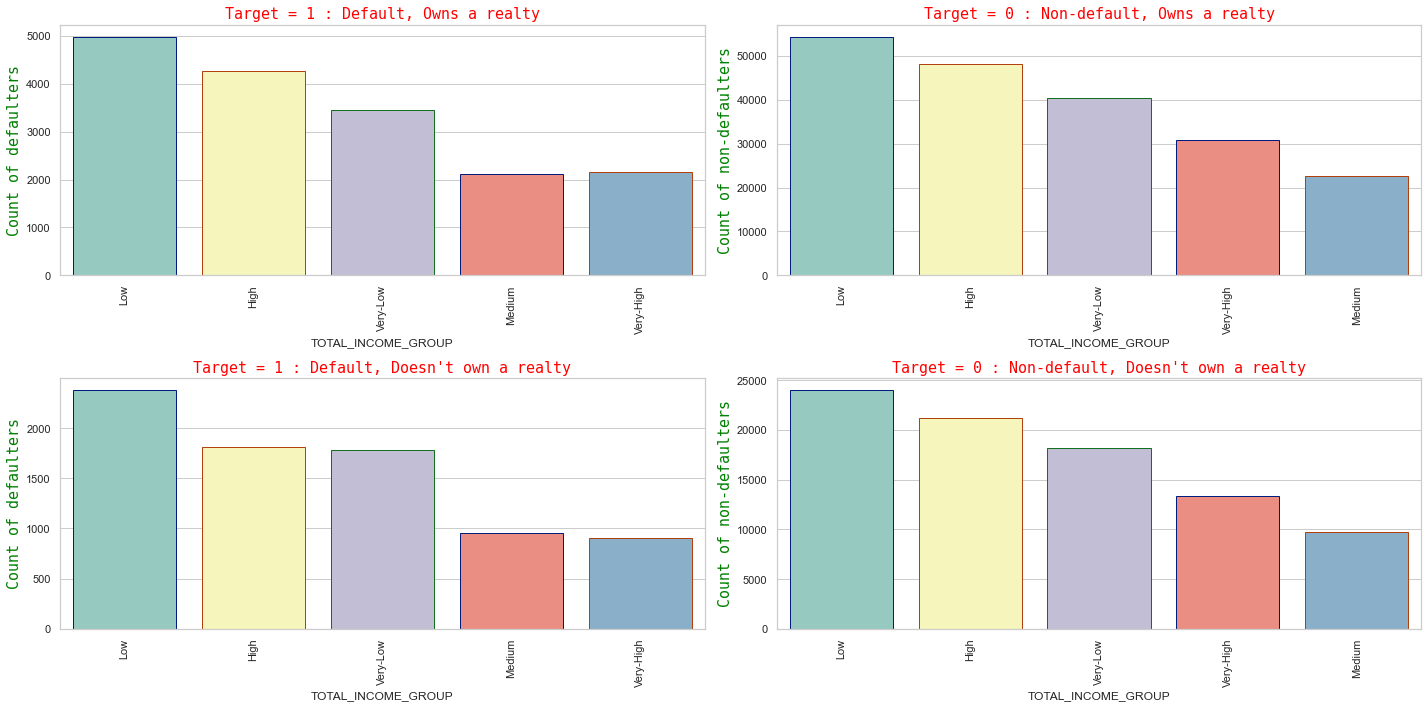

In [90]:
#FLAG_OWN_REALTY can be 1 and 0
sns.set_theme(style="whitegrid")

plt.figure(figsize=[20,10])

# Plot for defaulters
plt.subplot(2,2,1)
condition_defaulter = application_data_defaulter[application_data_defaulter['FLAG_OWN_REALTY'] == 1]

sns.countplot('TOTAL_INCOME_GROUP', data = condition_defaulter, palette="Set3", order = application_data_defaulter['TOTAL_INCOME_GROUP'].value_counts().index, edgecolor=sns.color_palette("dark", 3))

plt.title("Target = 1 : Default, Owns a realty",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)
plt.ylabel("Count of defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

# Plot for non-defaulters
plt.subplot(2,2,2)

condition_non_defaulter = application_data_non_defaulter[application_data_non_defaulter['FLAG_OWN_REALTY'] == 1]
sns.countplot('TOTAL_INCOME_GROUP', data = condition_non_defaulter, palette="Set3", order = application_data_non_defaulter['TOTAL_INCOME_GROUP'].value_counts().index, edgecolor=sns.color_palette("dark", 3))

plt.title("Target = 0 : Non-default, Owns a realty",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)
plt.ylabel("Count of non-defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

# Plot for defaulters
plt.subplot(2,2,3)
plt.title("Target = 1 : Default, Doesn't own a realty",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
condition_defaulter = application_data_defaulter[application_data_defaulter['FLAG_OWN_REALTY'] == 0]

sns.countplot('TOTAL_INCOME_GROUP', data = condition_defaulter, palette="Set3", order = application_data_defaulter['TOTAL_INCOME_GROUP'].value_counts().index, edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.ylabel("Count of defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

# Plot for non-defaulters
plt.subplot(2,2,4)

condition_non_defaulter = application_data_non_defaulter[application_data_non_defaulter['FLAG_OWN_REALTY'] == 0]
plt.title("Target = 0 : Non-default, Doesn't own a realty",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
sns.countplot('TOTAL_INCOME_GROUP', data = condition_non_defaulter, palette="Set3", order = application_data_non_defaulter['TOTAL_INCOME_GROUP'].value_counts().index, edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.ylabel("Count of non-defaulters", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})


plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. People with Very-Low income and don't own a realty tend to default more. <br>

<a id='6.3'></a>
## <span style = 'font-family:"Times New Roman"'> 6.3 Bivariate Analysis </span>


##### <span style='color:red'> Numeric-Categoric analysis 

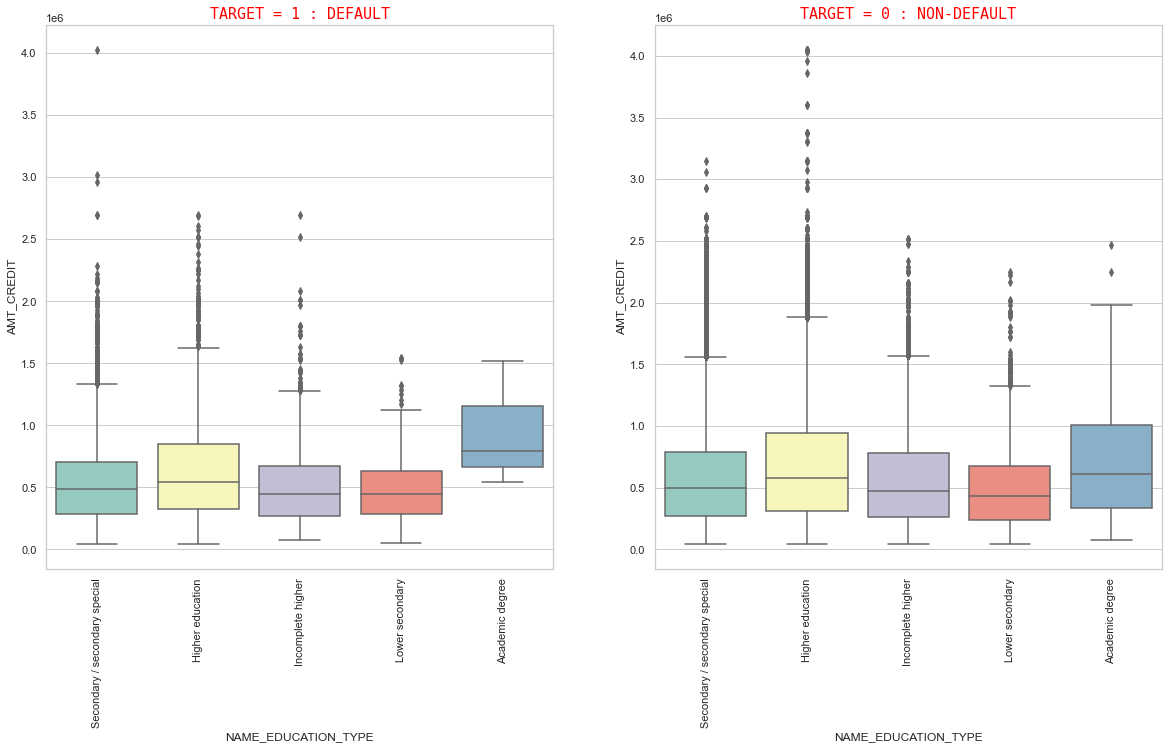

In [91]:
#NAME_EDUCATION_TYPE vs AMT_CREDIT
plt.figure(figsize = [20,10])
sns.set_palette("Set3")

plt.subplot(1,2,1)
sns.boxplot(x  = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = application_data_defaulter,  order = application_data_defaulter['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = application_data_non_defaulter, order = application_data_non_defaulter['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Both the graphs looks kinda similar, median is almost the same for both the cases except for a slight difference in people with 'Academic Degree'<br>
    2. In case of Default population 'Academic Degree', we can see that lowest AMT_CREDIT value for people with 'Academic degree' is higher than the median of the remaining categories.<br>
    3. This means that people with Higher education take the highest amount of loans(in credit).<br>
    4. There is a high variation in Non-defaulted people with 'Academic degree'

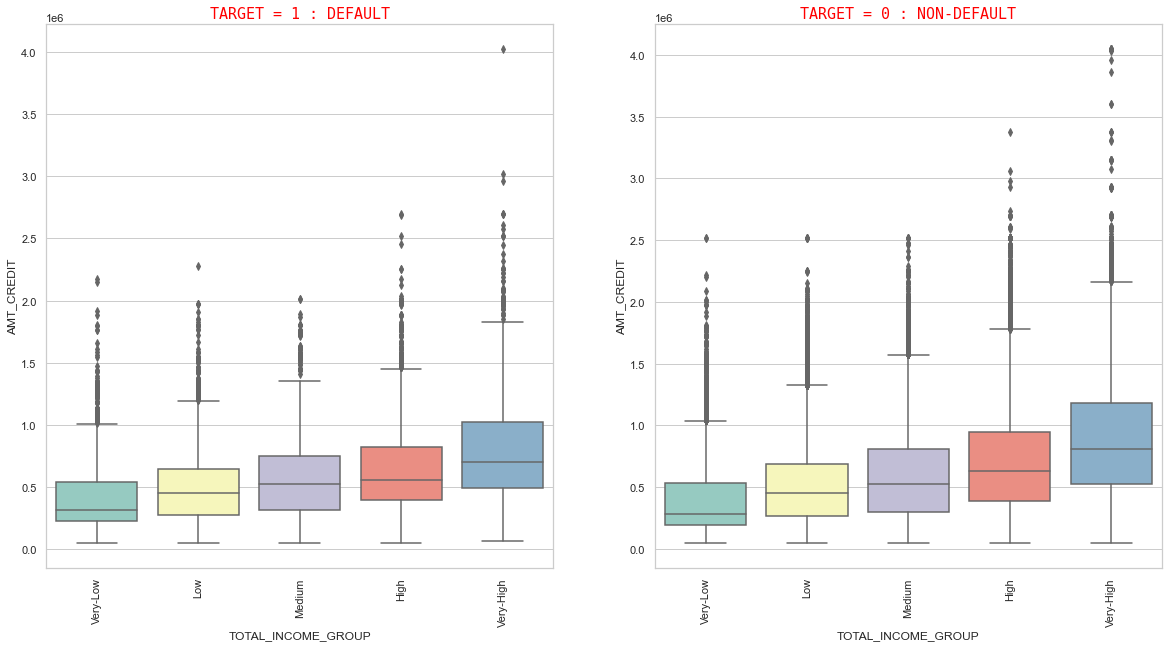

In [92]:
# TOTAL_INCOME_GROUP vs AMT_CREDIT
plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
sns.boxplot(x  = 'TOTAL_INCOME_GROUP', y = 'AMT_CREDIT',palette="Set3", data = application_data_defaulter)
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x = 'TOTAL_INCOME_GROUP', y = 'AMT_CREDIT',palette="Set3", data = application_data_non_defaulter)
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Both the graphs looks very similar

##### <span style='color:red'> Categoric-Categoric analysis 

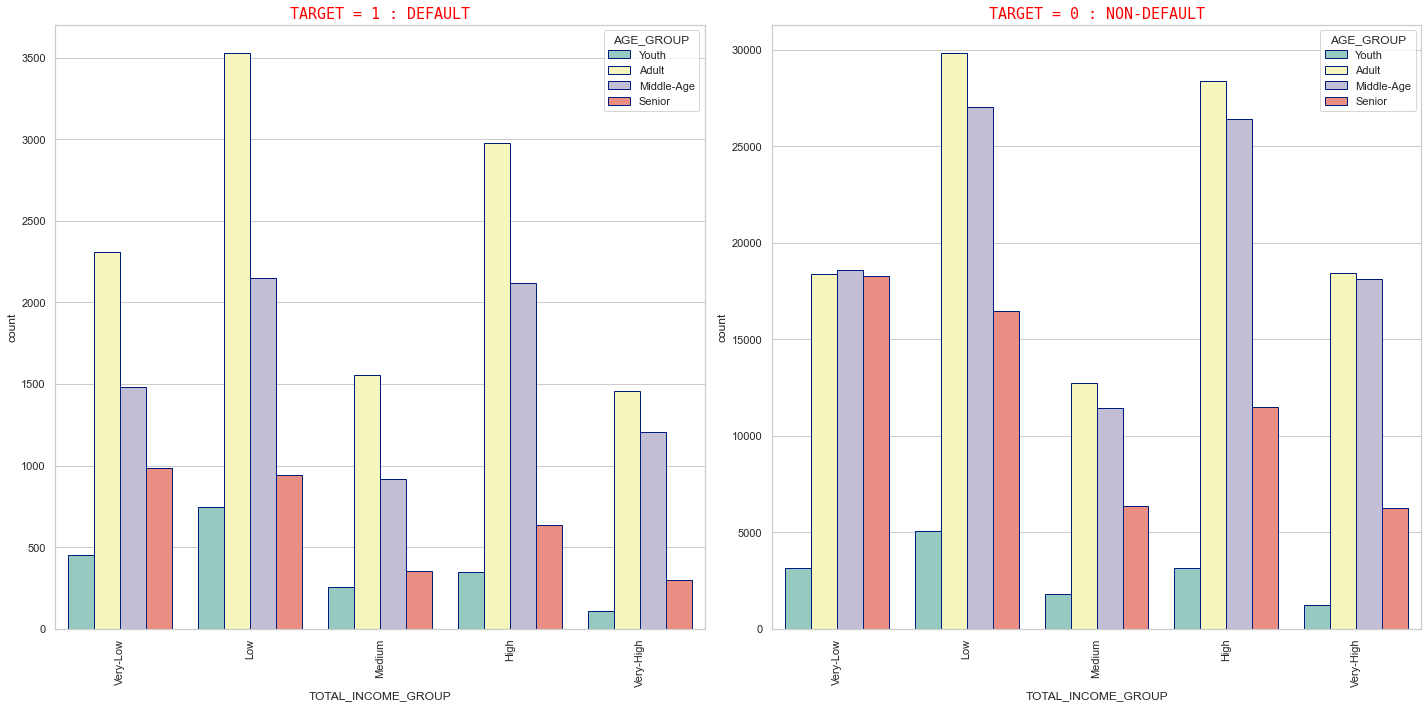

In [93]:
# TOTAL_INCOME_GROUP vs AGE_GROUP
plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
sns.countplot('TOTAL_INCOME_GROUP', hue = 'AGE_GROUP',palette="Set3", data = application_data_defaulter, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('TOTAL_INCOME_GROUP', hue = 'AGE_GROUP',palette="Set3", data = application_data_non_defaulter, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Among people with Very-Low income, 'Adults' tend to default more.<br>
    2. Among people with 'Very-Low' income, 'Seniors' tend to default less. <br>
    3. 'Very-High' and 'Medium' income would be our safe bet, because there are comparitively less default cases.

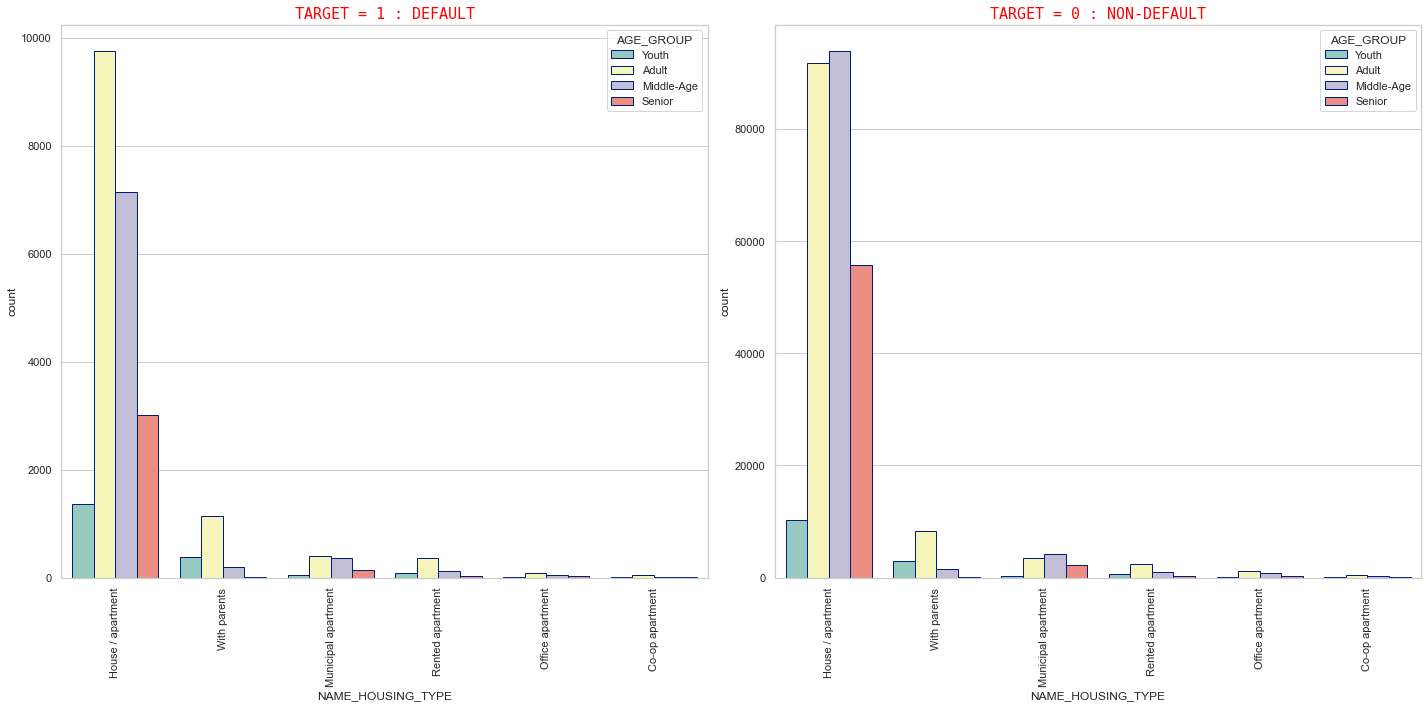

In [94]:
# NAME_HOUSING_TYPE vs AGE_GROUP
plt.figure(figsize = [20,10])
sns.set_palette('Set3')

plt.subplot(1,2,1)
sns.countplot('NAME_HOUSING_TYPE', hue = 'AGE_GROUP', data = application_data_defaulter,order=application_data_defaulter['NAME_HOUSING_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('NAME_HOUSING_TYPE', hue = 'AGE_GROUP', data = application_data_non_defaulter,order=application_data_non_defaulter['NAME_HOUSING_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Adults who own a house/apartment tend to default more.<br>

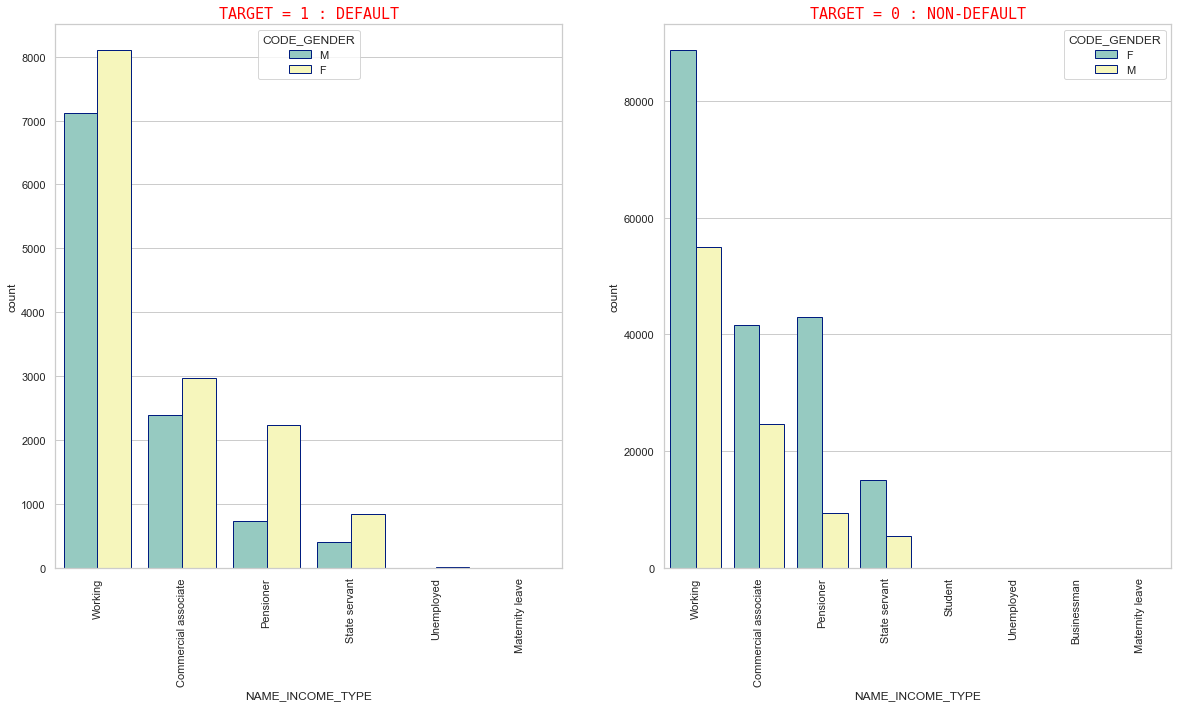

In [95]:
# NAME_INCOME_TYPE vs CODE_GENDER
plt.figure(figsize = [20,10])
sns.set_palette("Set3")

plt.subplot(1,2,1)
sns.countplot('NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = application_data_defaulter,order=application_data_defaulter['NAME_INCOME_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = application_data_non_defaulter,order=application_data_non_defaulter['NAME_INCOME_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that 'Female' default more than 'Male' in every income category<br>
    2. Working 'Male' tend to pay money on time, no payment difficulties.<br>

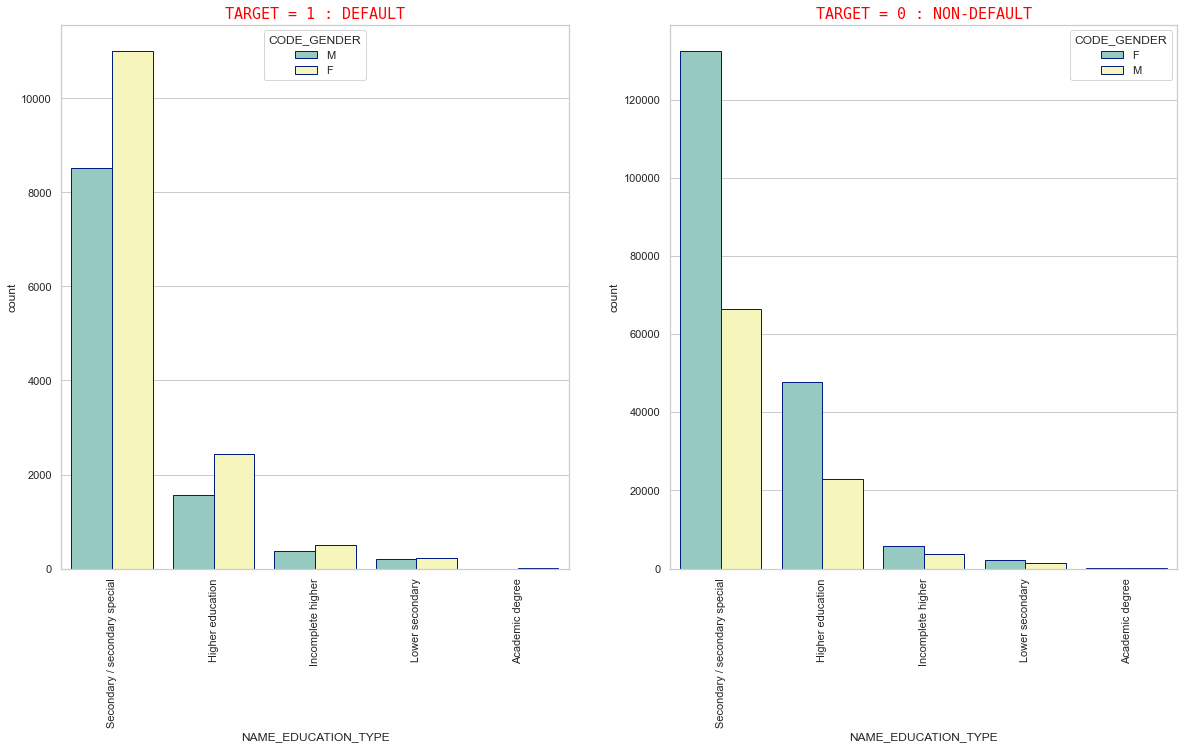

In [96]:
# NAME_EDUCATION_TYPE VS CODE_GENDER

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = application_data_defaulter,order=application_data_defaulter['NAME_EDUCATION_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = application_data_non_defaulter,order=application_data_non_defaulter['NAME_EDUCATION_TYPE'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)


plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'Female' tend to default more than 'Male' in every education category <br>
    2. Seconday/secondary special, Female has the highest count of loan default and there is a significant difference with other education categories.<br>
    3. 'Academic Degree' has the least amount of loan defaulting cases.

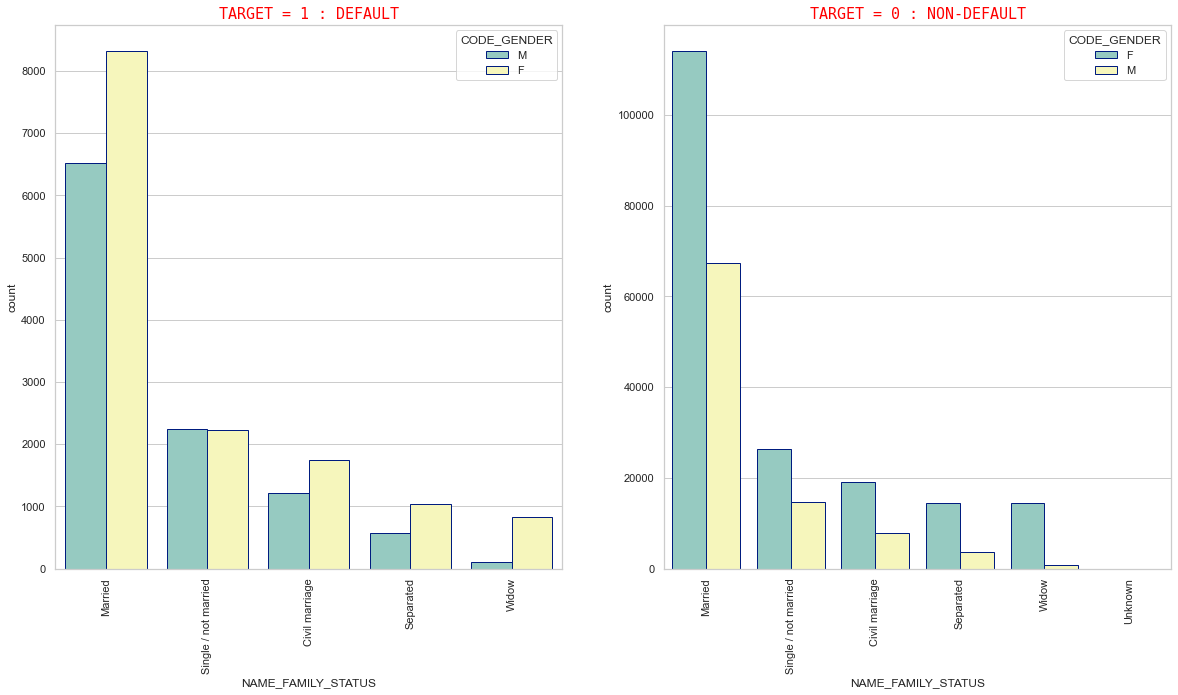

In [97]:
# NAME_FAMILY_STATUS VS CODE_GENDER

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data = application_data_defaulter, order=application_data_defaulter['NAME_FAMILY_STATUS'].value_counts().index,edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data = application_data_non_defaulter, order=application_data_non_defaulter['NAME_FAMILY_STATUS'].value_counts().index, edgecolor=sns.color_palette("dark", 1))
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Even here, 'Female' tend to default more than 'Male in almost every category.<br>
    2. 'Married Females' tend to default more than other categories. <br>
    3. 'Widowed Males' tend to default the least. <br>

##### <span style='color:red'> Numeric-Numeric analysis 

There are three ways to analyse the numeric - numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

Let's use pairplot and plot all the numeric columns for both defaulters and non-defaulters, so we get a basic idea on how they are related to each other.

### <span style = 'font-family:"Times New Roman"'>Pair plot for Defaulters </span>


<Figure size 1440x1440 with 0 Axes>

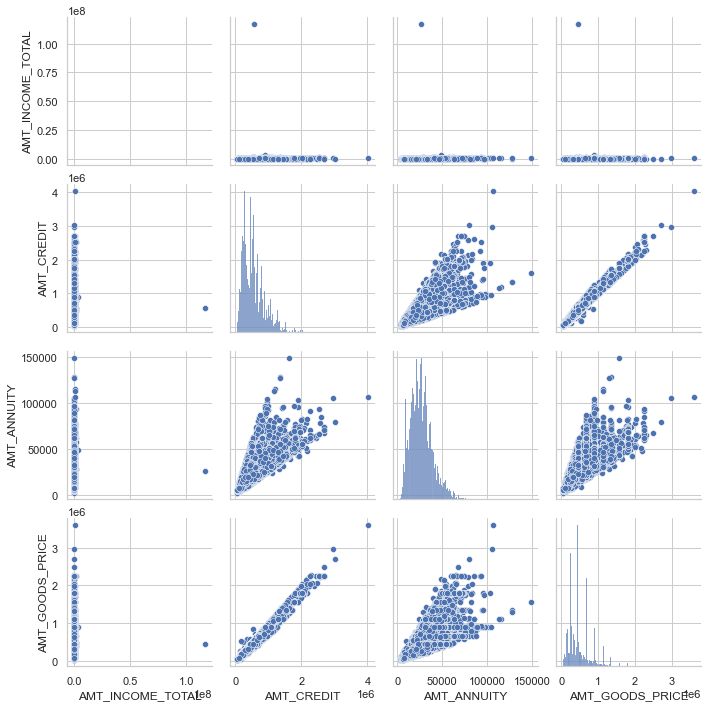

In [98]:
pairs_to_compare = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

sns.set_theme(style="whitegrid")

plt.figure(figsize=[20,20])

sns.pairplot(data= application_data_defaulter, vars = pairs_to_compare)

plt.show()

### <span style = 'font-family:"Times New Roman"'>Pair plot for Non-Defaulters </span>


<Figure size 1440x1440 with 0 Axes>

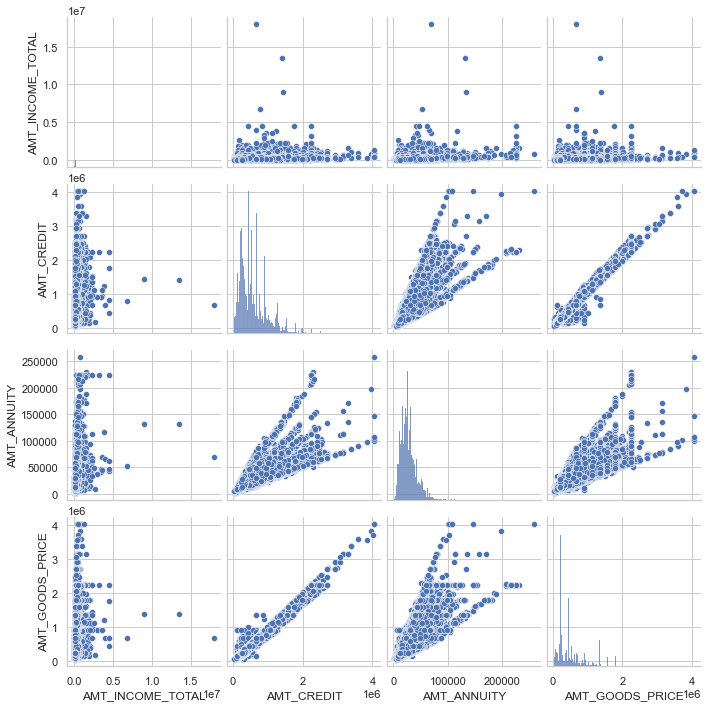

In [99]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[20,20])

sns.pairplot(data= application_data_non_defaulter, vars = pairs_to_compare)

plt.show()

### <span style = 'font-family:"Times New Roman"'>Let's see the correlation between these columns </span>


In [100]:
corrMatrix = application_data[pairs_to_compare].corr()

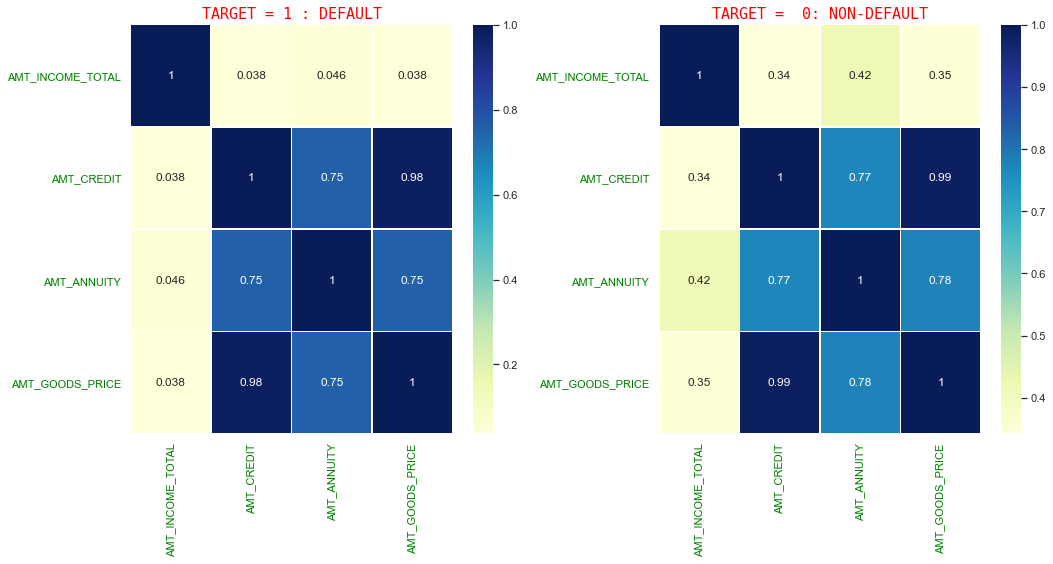

In [101]:
# Rhe corelation between these columns for those who defaulted
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

corrMatrix_defaulter = application_data_defaulter[pairs_to_compare].corr()
heatmap_defaulter = sns.heatmap(corrMatrix_defaulter, annot=True, cmap ="YlGnBu",linewidths=.5,fmt='.2g')
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
heatmap_defaulter.set_yticklabels(heatmap_defaulter.get_yticklabels(), rotation = 0, color="green")
heatmap_defaulter.set_xticklabels(heatmap_defaulter.get_xticklabels(), color="green")

# The corelation between these columns for those who didnt default
plt.subplot(1,2,2)
corrMatrix_non_defaulter = application_data_non_defaulter[pairs_to_compare].corr()
heatmap_non_defaulter = sns.heatmap(corrMatrix_non_defaulter, annot=True, cmap ="YlGnBu",linewidths=.5,fmt='.2g')
plt.title("TARGET =  0: NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
heatmap_non_defaulter.set_yticklabels(heatmap_non_defaulter.get_yticklabels(), rotation = 0, color="green")
heatmap_non_defaulter.set_xticklabels(heatmap_non_defaulter.get_xticklabels(), color="green")

plt.tight_layout()
plt.show()


<a id='6.4'></a>
## <span style = 'font-family:"Times New Roman"'> 6.4 Top 10 Correlations </span>


### <span style = 'font-family:"Times New Roman"'>Let's see the top 10 correlations for clients with payment difficulties </span>

In [102]:
# Client with payment difficulties => Target is 1 => Defaulter
corr=application_data_defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_ANNUITY','YEARS_EMPLOYED','AGE','AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()


In [103]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)

In [104]:
corr_df.sort_values('CORRELATION', ascending=False).head(10)

,VAR1,VAR2,CORRELATION
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103
26,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885484
32,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699
60,AMT_CREDIT,AMT_ANNUITY,0.752195
53,AGE,YEARS_EMPLOYED,0.582441
48,AGE,AMT_GOODS_PRICE,0.135603
62,AMT_CREDIT,AGE,0.135070
34,AMT_ANNUITY,CNT_FAM_MEMBERS,0.075711
58,AMT_CREDIT,CNT_FAM_MEMBERS,0.051224
16,CNT_FAM_MEMBERS,AMT_GOODS_PRICE,0.047388


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see our top 10 correlations for clients with payment difficukties here. Among these,<br> 
        AMT_CREDIT and	AMT_GOODS_PRICE	
        CNT_CHILDREN and	CNT_FAM_MEMBERS	
        AMT_ANNUITY and	AMT_GOODS_PRICE	
        AMT_CREDIT and	AMT_ANNUITY	
        AGE and YEARS_EMPLOYED<br>
    should be where we need to spend most of our decision making time

<a id='6.5'></a>
## <span style = 'font-family:"Times New Roman"'> 6.5 Multivariate Analysis </span>


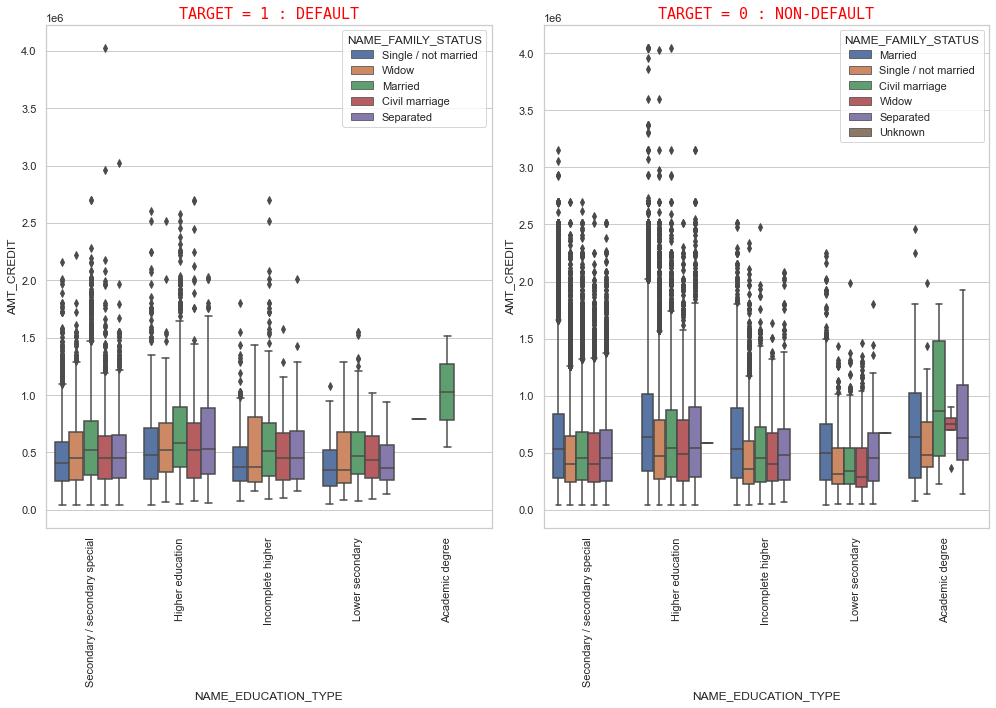

In [105]:
# NAME_EDUCATION_TYPE, AMT_CREDIT, NAME_FAMILY_STATUS
plt.figure(figsize=[14,10])

plt.subplot(1,2,1)
sns.boxplot(data =application_data_defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',order = application_data_defaulter['NAME_EDUCATION_TYPE'].value_counts().index,orient='v')
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data =application_data_non_defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',order = application_data_non_defaulter['NAME_EDUCATION_TYPE'].value_counts().index,orient='v')
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Both the graphs are kind similar apart from the 'Academic degree' category.<br>
    2. There are a lot of outliers in 'Higher Education' and 'Secondary/secondary special' category.

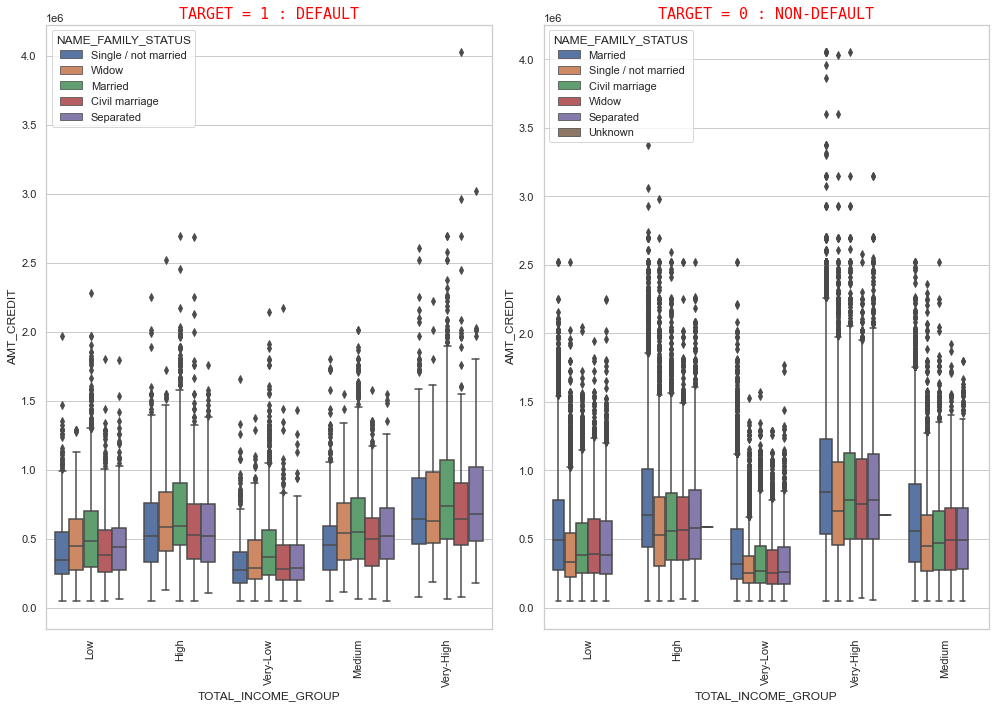

In [106]:
# TOTAL_INCOME_GROUP, AMT_CREDIT, NAME_FAMILY_STATUS
plt.figure(figsize=[14,10])

plt.subplot(1,2,1)
sns.boxplot(data =application_data_defaulter, x='TOTAL_INCOME_GROUP',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',order = application_data_defaulter['TOTAL_INCOME_GROUP'].value_counts().index,orient='v')
plt.title("TARGET = 1 : DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data =application_data_non_defaulter, x='TOTAL_INCOME_GROUP',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',order = application_data_non_defaulter['TOTAL_INCOME_GROUP'].value_counts().index,orient='v')
plt.title("TARGET = 0 : NON-DEFAULT",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Both the graphs are kind similar.<br>
    2. People with Very-High income and belonging to 'Civil marriage', 'Separated' and 'Married' got high AMT_CREDIT.

<a id='6.6'></a>
## <span style = 'font-family:"Times New Roman"'> 6.6 Pivot Tables </span>


In [107]:
table1 = pd.pivot_table(application_data, values='TARGET', index=['CODE_GENDER','TOTAL_INCOME_GROUP'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
table1

NAME_EDUCATION_TYPE             Academic degree  Higher education  \
CODE_GENDER TOTAL_INCOME_GROUP                                      
F           Very-Low                    0.00000          0.056068   
            Low                         0.00000          0.048995   
            Medium                      0.00000          0.053780   
            High                        0.00000          0.048719   
            Very-High                   0.09375          0.040119   
M           Very-Low                    0.00000          0.080411   
            Low                         0.00000          0.074449   
            Medium                      0.00000          0.074796   
            High                        0.00000          0.068326   
            Very-High                   0.00000          0.050901   

NAME_EDUCATION_TYPE             Incomplete higher  Lower secondary  \
CODE_GENDER TOTAL_INCOME_GROUP                                       
F           Very-Low                     0.086399         0.080193   
            Low                          0.080813         0.115160   
            Medium                       0.095299         0.096330   
            High                         0.068446         0.096429   
            Very-High                    0.076561         0.043478   
M           Very-Low                     0.123967         0.125000   
            Low                          0.103571         0.143469   
            Medium                       0.072687         0.178161   
            High                         0.099125         0.134557   
            Very-High                    0.075576         0.077519   

NAME_EDUCATION_TYPE             Secondary / secondary special  
CODE_GENDER TOTAL_INCOME_GROUP                                 
F           Very-Low                                 0.076778  
            Low                                      0.078816  
            Medium                                   0.080406  
            High                                     0.074378  
            Very-High                                0.069675  
M           Very-Low                                 0.118066  
            Low                                      0.123617  
            Medium                                   0.119750  
            High                                     0.111335  
            Very-High                                0.092591

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Among females, those with LOW income and Lower Secondary education have maximum % of Loan-Payment Difficulties<br>
    2. Among males, those with MEDIUM income and Lower Secondary education have maximum % of Loan-Payment Difficulties<br>

<a id='7'></a>
# <span style = 'font-family:"Times New Roman"'> 7. Checking the previous_application_data dataframe </span>
***



In [108]:
previous_application_data.shape

(1670214, 37)

In [109]:
previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
previous_application_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [111]:
previous_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<a id='7.1'></a>
### <span style = 'font-family:"Times New Roman"'> 7.1 Checking the null percentage of all columns </span>


In [112]:
# Checking the percentage of null values for all the attributes.

# Null percentage in application data 
null_perc = (previous_application_data.isnull().sum()/len(previous_application_data) * 100)

# Rounding off to 2 digits and sorting in descending order 
null_df = round(null_perc,2).sort_values(ascending = False)
null_df.head(20)


RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
RATE_DOWN_PAYMENT             53.64
AMT_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE               49.12
DAYS_TERMINATION              40.30
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_FIRST_DRAWING            40.30
DAYS_FIRST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_LAST_DUE                 40.30
AMT_GOODS_PRICE               23.08
CNT_PAYMENT                   22.29
AMT_ANNUITY                   22.29
PRODUCT_COMBINATION            0.02
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
dtype: float64

In [113]:
# Lets drop these 3 columns with null percentage greater than 35%.

columns_to_drop = list(null_df[null_df > 35].index)
previous_application_data.drop(labels = columns_to_drop,axis =1,inplace=True)

# Checking the shape of the dataframe after dropping the columns.

previous_application_data.shape

(1670214, 26)

In [114]:
# changing the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in previous_application_data if col.startswith('DAYS')]
previous_application_data[filter_col]= abs(previous_application_data[filter_col])

In [115]:
# XNA and XAP are replaced by NaN
previous_application_data=previous_application_data.replace('XNA', np.NaN)
previous_application_data=previous_application_data.replace('XAP', np.NaN)

<a id='7.2'></a>
### <span style = 'font-family:"Times New Roman"'> 7.2 Univariate Analysis </span>


### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_CONTRACT_TYPE </span>


In [116]:
previous_application_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [117]:
# Defining a function to plot for all the categorical variables and plotting them over NAME_CONTRACT_STATUS

def plot_prev_app(df,var_name,hue_name, rotation = 90):
    plt.style.use('seaborn-deep')
    plt.figure(figsize=[15,5])
    
    sns.countplot(x=var_name, data=df,hue=hue_name,palette="Set3", edgecolor=sns.color_palette("dark", 1))
    plt.title(f"Distribution of {var_name}",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
    plt.xticks(rotation=rotation)
    
    plt.show()

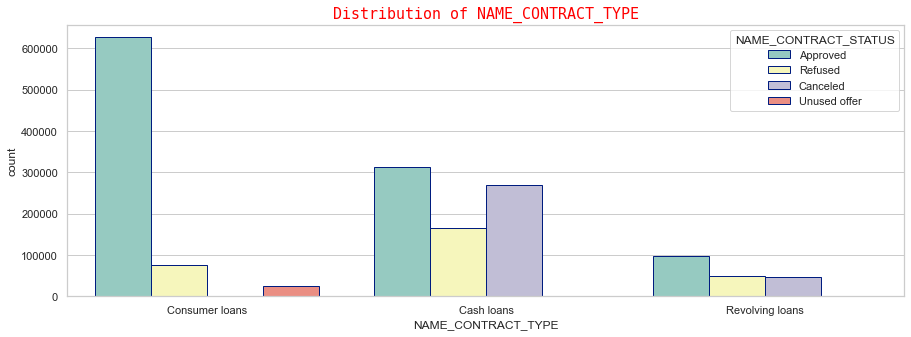

In [118]:
plot_prev_app(previous_application_data,var_name = 'NAME_CONTRACT_TYPE', hue_name='NAME_CONTRACT_STATUS', rotation=0)


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Revolving Loans previous application have Loan payment difficulties from current application.<br>
    2. 'Cash loans' has the highest rejection rate compared to others.<br>
    3. 'Consumer loans' and 'Cash loans' is where majority of the previous application lies in.

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_PAYMENT_TYPE </span>


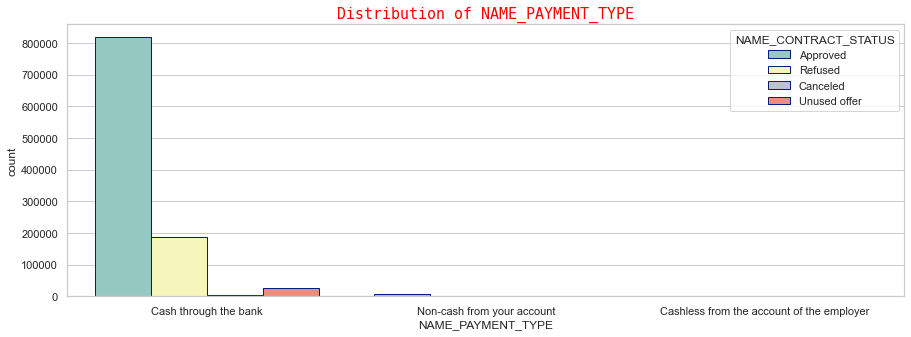

In [119]:
plot_prev_app(previous_application_data,var_name = 'NAME_PAYMENT_TYPE',hue_name='NAME_CONTRACT_STATUS',rotation= 0)


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Most of the consumers pay Cash through the bank.<br>

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_CLIENT_TYPE </span>


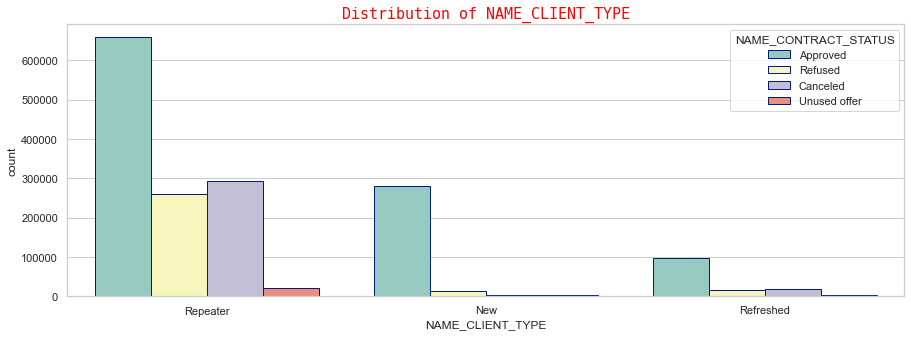

In [120]:
plot_prev_app(previous_application_data,var_name='NAME_CLIENT_TYPE',hue_name='NAME_CONTRACT_STATUS',rotation= 0)


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Most of the clients are 'Repeaters' and we can also see that approval rate is higher for 'Repeaters' and 'New' clients.<br>
    2. Refusal rate is highest for 'Repeaters'

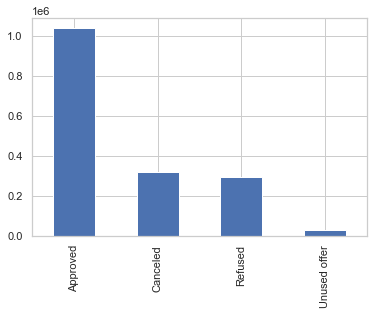

In [121]:
# NAME_CONTRACT_STATUS
previous_application_data['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'Unused offer' has the least amount among all.<br>
    2. Majority of the loans have been approved. 

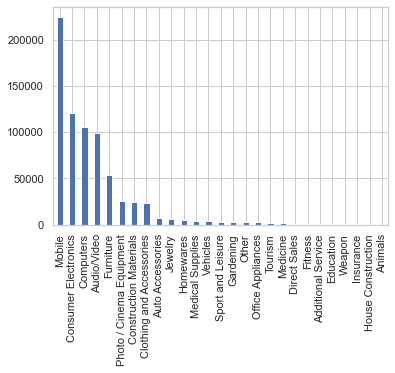

In [122]:
# NAME_GOODS_CATEGORY
previous_application_data['NAME_GOODS_CATEGORY'].value_counts().plot.bar()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Most of the loans are taken by 'Mobile', 'Consumer Electronics', 'Computers' and 'Audio/Video' Goods categories.<br>

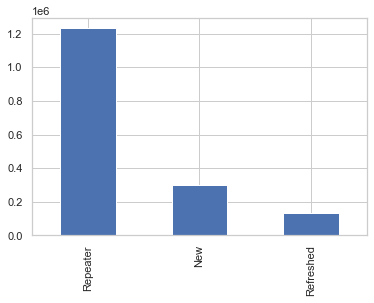

In [123]:
# NAME_CLIENT_TYPE
previous_application_data['NAME_CLIENT_TYPE'].value_counts().plot.bar()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. We can see that most of the clients are 'Repeaters'<br>

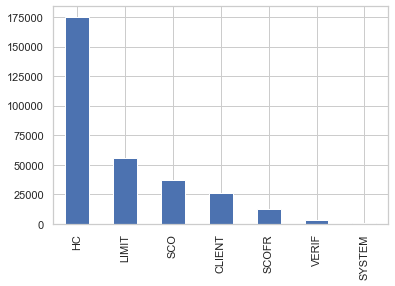

In [124]:
# CODE_REJECT_REASON
previous_application_data['CODE_REJECT_REASON'].value_counts().plot.bar()
plt.show()

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Majority of CODE_REJECT_REASON is 'HC'

<a id='7.3'></a>
### <span style = 'font-family:"Times New Roman"'> 7.3 Top10 correlations in the previous application dataset </span>


In [125]:
# Top10 correlations in previous application dataset
corr=previous_application_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','NAME_PAYMENT_TYPE','DAYS_DECISION','NAME_CASH_LOAN_PURPOSE','AMT_GOODS_PRICE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','CODE_REJECT_REASON','NAME_CONTRACT_STATUS']].corr(method='pearson')



In [126]:
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)

In [127]:
corr_df.head(10)

,VAR1,VAR2,CORRELATION
5,AMT_APPLICATION,AMT_ANNUITY,0.808872
10,AMT_CREDIT,AMT_ANNUITY,0.816429
11,AMT_CREDIT,AMT_APPLICATION,0.975824
15,DAYS_DECISION,AMT_ANNUITY,-0.279051
16,DAYS_DECISION,AMT_APPLICATION,-0.133660
17,DAYS_DECISION,AMT_CREDIT,-0.133763
20,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
21,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884
22,AMT_GOODS_PRICE,AMT_CREDIT,0.993087
23,AMT_GOODS_PRICE,DAYS_DECISION,-0.290422


<a id='7.4'></a>
### <span style = 'font-family:"Times New Roman"'> 7.4 Bivariate Analysis </span>


<Figure size 1440x1440 with 0 Axes>

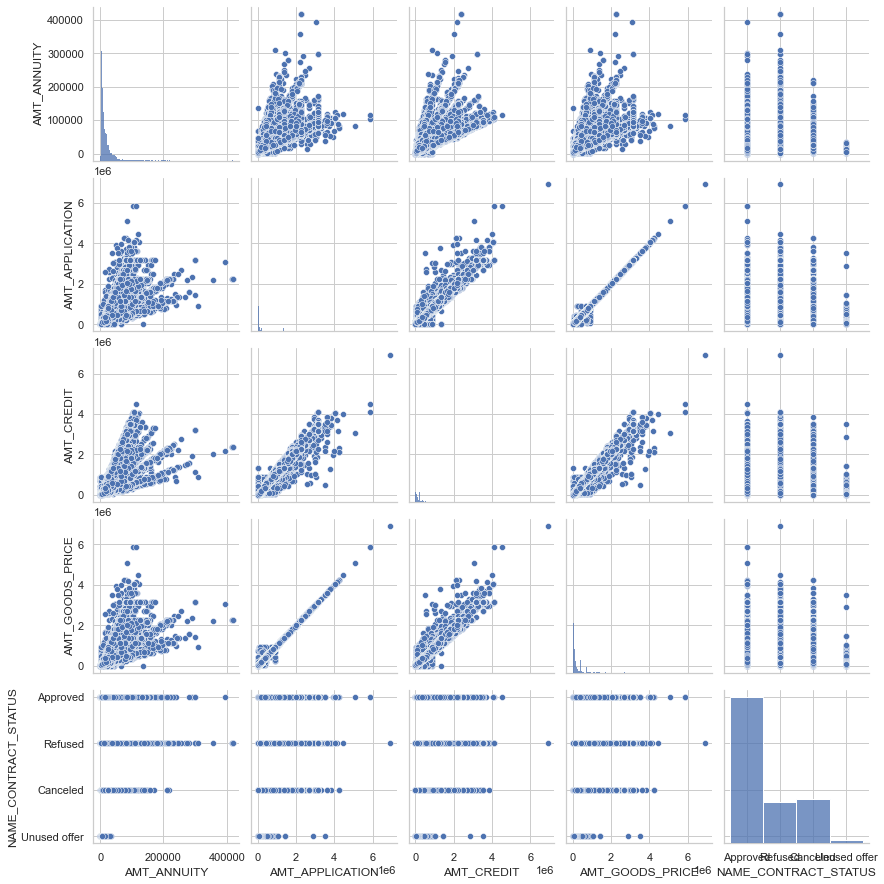

In [128]:
pairs_to_compare = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']

sns.set_theme(style="whitegrid")

plt.figure(figsize=[20,20])

sns.pairplot(data= previous_application_data, vars = pairs_to_compare)

plt.show()

<a id='7.5'></a>
### <span style = 'font-family:"Times New Roman"'> 7.5 Analysis by merging both previous and new application data</span>


In [129]:
# Merging both the datasets on SK_ID_CURR

temp = application_data[['SK_ID_CURR','TARGET']]

merge_data = temp.merge(previous_application_data,on='SK_ID_CURR', how='inner')
merge_data.shape

(1413646, 27)

In [130]:
merge_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,NaN,Approved,606,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,NaN,Approved,746,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,NaN,Approved,828,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,NaN,Approved,2341,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,NaN,Approved,815,Cash through the bank,NaN,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_CONTRACT_STATUS </span>


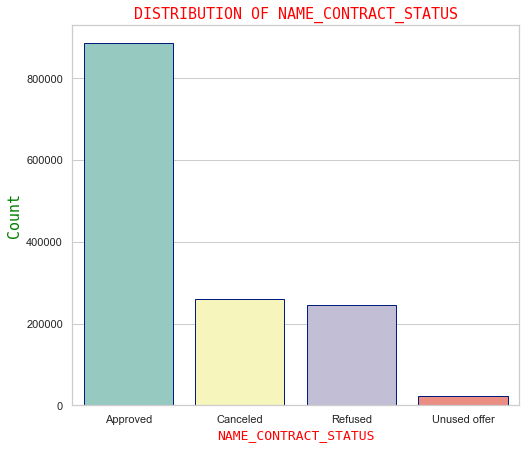

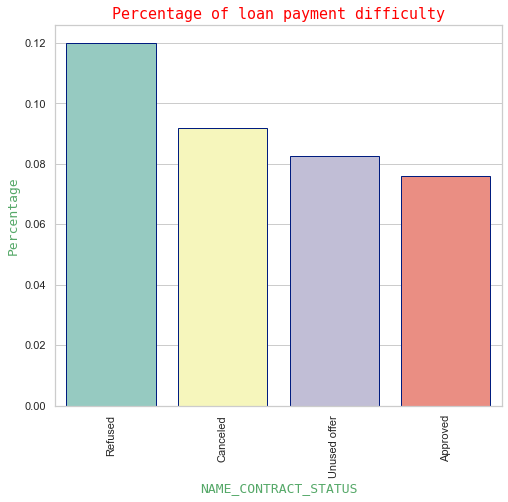

In [131]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[8,7])
sns.countplot('NAME_CONTRACT_STATUS', data = merge_data, palette="Set3", edgecolor=sns.color_palette("dark", 1))

plt.title("DISTRIBUTION OF NAME_CONTRACT_STATUS",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('NAME_CONTRACT_STATUS',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=0)
plt.ylabel("Count", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

loan_payment_difficulty(merge_data,'NAME_CONTRACT_STATUS',90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. Refused contracts from previous application have the highest loan payment difficulties from current application compared to other contracts.<br>
    2. 'Canceled' followed by 'Refused' has the second highest loan payment difficulty percentage.
    

### <span style = 'font-family:"Times New Roman"'> Dealing with NAME_CONTRACT_TYPE </span>


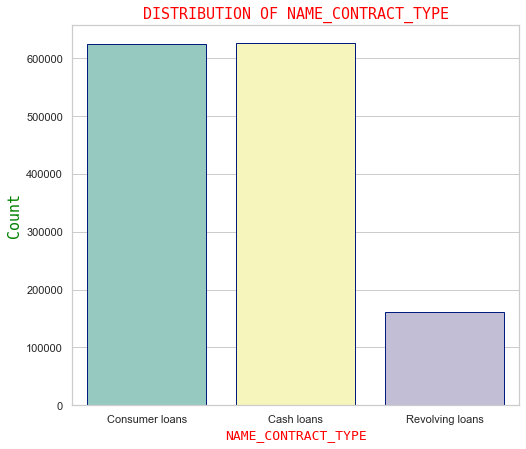

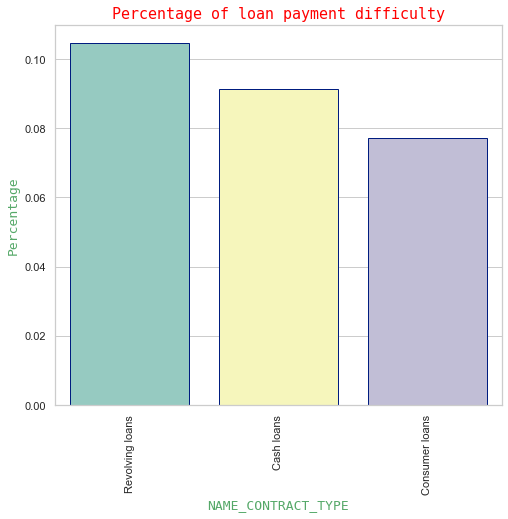

In [132]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=[8,7])
sns.countplot('NAME_CONTRACT_TYPE', data = merge_data, palette="Set3", edgecolor=sns.color_palette("dark", 1))

plt.title("DISTRIBUTION OF NAME_CONTRACT_TYPE",fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 7, 'color' : 'Red'})
plt.xlabel('NAME_CONTRACT_TYPE',fontdict={'family':'monospace','fontsize': 13, 'fontweight' : 7, 'color' : 'Red'})
plt.xticks(rotation=0)
plt.ylabel("Count", fontdict={'family':'monospace','fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

loan_payment_difficulty(merge_data,'NAME_CONTRACT_TYPE',90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'Resolving loans' have the highest loan payment difficulties compared to others.<br>
    2. 'Consumer loans' have the lowest loan payment difficulties compared to others.

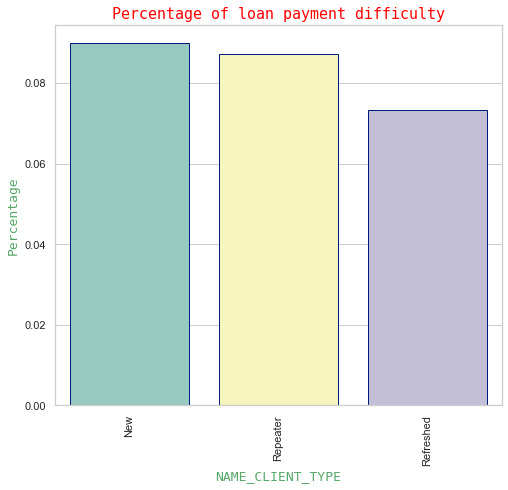

In [133]:
# NAME_CLIENT_TYPE
loan_payment_difficulty(merge_data,'NAME_CLIENT_TYPE',90)

<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'New' clients have the highest percentage of loan payment difficulties. <br>
    2. There is not much difference between 'New' and 'Repeater' clients<br>

<a id='7.6'></a>
### <span style = 'font-family:"Times New Roman"'> 7.6 Pivot Tables</span>


In [134]:
table2 = pd.pivot_table(merge_data, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table2


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088217,0.145205,0.110967,0.089448
Refreshed,0.065159,0.081098,0.117422,0.074324
Repeater,0.072146,0.091770,0.120607,0.083338


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'New' clients who canceled and refused loans, 'Refreshed' clients who refused precious loans have the highest loan payment difficulty.<br>

In [135]:
table3 = pd.pivot_table(merge_data, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table3


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075518,0.088403,0.125817,0.092593
Consumer loans,0.073855,0.128668,0.101355,0.082337
Revolving loans,0.090343,0.109256,0.129094,0.000000


<span style ='font-family:"monospace";font-size: 13pt;'>**Inferences:** </span>
<br><br>
<span style = 'color:darkred'><span style ='font-family:"monaco"'>
    1. 'Resolving loan' and 'Refused' , 'Consumer loan' and 'Cancelled', 'Cash loans' and 'Refused' have the highest loan payment difficulties.
    

<a id='8'></a>
# <span style = 'font-family:"Times New Roman"'> 8. Conclusion </span>
***



<span style = 'color:darkred'><span style ='font-family:"monaco"'>
Based on the current applictaion dataset, following are the cases where people would default more:<br><br>
    1. 'NAME_INCOME_TYPE': <span style = 'color:blue'>**'Maternity Leave'**</span>  - Since there are less people who apply for loan on this category but the loan payment difficulty percentage is very high. Also, their default percentage is more than non-default percentage<br>
        2. 'NAME_INCOME_TYPE' : <span style = 'color:blue'>**'Unemployed'**</span>- Since there are less people who apply for loan on this category but the loan payment difficulty percentage is the second highest. <br>
    3. 'OCCUPATION_TYPE' : <span style = 'color:blue'>**'Low skilled laborers', 'Security staff','Waiters'**</span>Since there are less people who apply for loan on this category but the loan payment difficulty percentage is very high. Also, their default percentage is higher than non-default percentage.<br>
    4. 'AGE_GROUP' : <span style = 'color:blue'>**'Youth'**</span>There are less people who apply for loan in this category but default percentage and the loan payment difficulty percentage is high for this category.<br>
    5. 'NAME_EDUCATION_TYPE' : <span style = 'color:blue'>**'Lower Secondary'**</span> They have the highest loan payment difficulty.<br>
    6. 'CODE_GENDER' : <span style = 'color:blue'>**'Female'**</span> tend to default more when compared with every income category and every education category.<br>
    7. 'NAME_FAMILY_STATUS' : <span style = 'color:blue'>**'Single/Not married'**</span> tend to default more, since they have high loan payment difficulty and also their default percentage is more than non-default percentage<br>
    8. People who don't own a realty/car tend to default more.<br>
<br><br>
Based on the previous application dataset, following are the cases where people would default more:<br><br>
    1. 'NAME_CONTRACT_STATUS' : <span style = 'color:blue'>**'Refused'**</span><br>
    2. 'NAME_CONTRACT_TYPE' : <span style = 'color:blue'>**'Resolving loans'**</span><br>
    3. <span style = 'color:blue'>**'Resolving loan' and 'Refused' , 'Consumer loan' and 'Cancelled', 'Cash loans' and 'Refused'**</span> have the highest loan payment difficulties.
   